# Data Analysis Notebook - The New York Times

This is the 3rd notebook of The New York Times project series. In the previous notebook we collected the data from 1950 - present through the Archive API. In this notebook we will clean and organize the obtained dataframe and filter the relevant data.

This notebook contains **several dataframes**. Here are the df's that are important for our analysis along with the summary of their contents:<br>
****************************************************************************************************************
* **df** (also known as the **frame_all.pickle**): <br>
contains all the data between 1950 and the present day (11+ million rows). It was acquired through the [Archive API](https://developer.nytimes.com/docs/archive-product/1/overview) of The New York Times. The Archive API allows for efficient bulk data collection for extensive periods of time, but it doesn't allow any kind of querying. This is why all the filtering is performed on the dataframe directly.
****************************************************************************************************************
* **project_df**: <br>
contains data filtered from the big **df** based on the presence of certain keywords in the article titles as well *keywords column.* Our target keywords used for filtering include, but aren't limited to, activism, suffragist movement, science, technology, professonal growth, entrepreneurship, feminism, business and politics.
****************************************************************************************************************
* **persons**: <br>
dataframe that I obtained by searching for certain names mentioned in the headlines, e.g. Serena Williams, Harriet Tubman and Malala Yousafzai.

#### Importing tools and libraries

In [1]:
import os
import json
import time
import requests
import datetime
import dateutil
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import pickle
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords

#### Getting the dataframe from pickle - contains 1950's - present data

In [11]:
with open('frame_all.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [12]:
df

,headline,date,doc_type,material_type,section,keywords
0,Missed Chances a Sign the Transformation Is Not Over,2006-12-03,article,News,NaN,"['Football', 'College Athletics']"
1,The Collector,2006-12-03,article,News,NaN,"['Collectors and Collections', 'Art', 'Travel and Vacations', 'Frieze Art Fair']"
2,Working Out Those Royal Father-Son Issues on a Grand Stage,2006-12-02,article,Review,NaN,"['Reviews', 'Opera']"
3,Joshua Rikon and Rebecca Benjamin,2006-12-03,article,News,NaN,"['Dating (Social)', 'Weddings and Engagements']"
4,"Catch a Ferry, Unclog a Highway",2006-12-03,article,Editorial,NaN,"['Transit Systems', 'Commuting', 'Ferries']"
...,...,...,...,...,...,...
11472897,RIGHTS CHIEF ASSAILS HIRING GOALS AS FAILURE,1985-11-01,article,News,NaN,"['Speeches and Statements', 'AFFIRMATIVE ACTION', 'LABOR', 'BLACKS (IN US)', 'Hiring and Promoti..."
11472898,WESTERN TELE COMMUNICAIONS reports earnings for Qtr to Sept 30,1985-10-31,article,Statistics,NaN,['Company Reports']
11472899,The Griffin Quartet,1985-11-01,article,News,NaN,['Music']
11472900,150 Guatemalans Seize Cathedral in Protest,1985-11-01,article,News,NaN,"['Missing Persons', 'Demonstrations and Riots', 'Church-State Relations']"


* Converting the date column into the datetime format so that articles can be sorted chronologically. Removing nulls and duplicates.

In [13]:
df['date'] = pd.to_datetime(df['date']) 

In [14]:
df

,headline,date,doc_type,material_type,section,keywords
0,Missed Chances a Sign the Transformation Is Not Over,2006-12-03,article,News,NaN,"['Football', 'College Athletics']"
1,The Collector,2006-12-03,article,News,NaN,"['Collectors and Collections', 'Art', 'Travel and Vacations', 'Frieze Art Fair']"
2,Working Out Those Royal Father-Son Issues on a Grand Stage,2006-12-02,article,Review,NaN,"['Reviews', 'Opera']"
3,Joshua Rikon and Rebecca Benjamin,2006-12-03,article,News,NaN,"['Dating (Social)', 'Weddings and Engagements']"
4,"Catch a Ferry, Unclog a Highway",2006-12-03,article,Editorial,NaN,"['Transit Systems', 'Commuting', 'Ferries']"
...,...,...,...,...,...,...
11472897,RIGHTS CHIEF ASSAILS HIRING GOALS AS FAILURE,1985-11-01,article,News,NaN,"['Speeches and Statements', 'AFFIRMATIVE ACTION', 'LABOR', 'BLACKS (IN US)', 'Hiring and Promoti..."
11472898,WESTERN TELE COMMUNICAIONS reports earnings for Qtr to Sept 30,1985-10-31,article,Statistics,NaN,['Company Reports']
11472899,The Griffin Quartet,1985-11-01,article,News,NaN,['Music']
11472900,150 Guatemalans Seize Cathedral in Protest,1985-11-01,article,News,NaN,"['Missing Persons', 'Demonstrations and Riots', 'Church-State Relations']"


In [15]:
df = df[df['headline'].notna()].drop_duplicates().sort_values(by='date') 

In [18]:
df.dropna(axis=0, subset=['keywords'], inplace = True)

In [19]:
df

,headline,date,doc_type,material_type,section,keywords
4289684,"DEMOCRATS TAKE OFFICE; Town of Smithtown, L. I., Ends Long Tenure of Republicans",1950-01-02,article,Archives,NaN,[]
4289750,Ring--Peskoe,1950-01-02,article,Archives,NaN,[]
4290071,"MINERS FEEL PINCH IN LONG SLOWDOWN; 13,000 in West Virginia Typify Victims of Slump as Coal Runs...",1950-01-02,article,Archives,NaN,"['Coal', 'EMPLOYES AND OFFICIALS', 'MISCELLANEOUS SECTION']"
4289748,Sports of the Times; Bowling Along,1950-01-02,article,Archives,NaN,"['Football', 'Bowl Games']"
4290072,Cancer Consultant Retires,1950-01-02,article,Archives,NaN,[]
...,...,...,...,...,...,...
11062065,Officer Charged in Fatal Shooting of a Black Man in a California Walmart,2020-09-03,article,News,NaN,"['Police Brutality, Misconduct and Shootings', 'Stun Guns', 'Black People', 'Blacks', 'Police']"
11062067,Trump and the Attack of the Invisible Anarchists,2020-09-03,article,Op-Ed,NaN,"['Presidential Election of 2020', 'Polls and Public Opinion', 'Coronavirus (2019-nCoV)', 'Murder..."
11061791,Jimmy Lai vs. China,2020-09-03,article,News,NaN,[]
11062156,Navalny Poisoning Raises Pressure on Merkel to Cancel Russian Pipeline,2020-09-03,article,News,NaN,"['Politics and Government', 'Poisoning and Poisons', 'Natural Gas', 'Pipelines']"


#### Examine relevant keywords

In [20]:
import ast
df.keywords = df.keywords.astype(str).str.lower().transform(ast.literal_eval)

In [24]:
keyword_counts = pd.Series(x for l in df['keywords'] for x in l).value_counts(ascending=False)
#keyword_counts = keyword_counts[keyword_counts >= 2]
len(keyword_counts)

58298

**58,298** unique keywords

#### Keywords related to strong women, such as women in politics, military, science and leadership.

In [25]:
project_keywords0 = [x for x in keyword_counts.keys() if ('woman' in x 
                 or 'women' in x  
                 or 'female' in x ) 
                 and ('leader' in x 
                 or 'leadership' in x 
                 or 'success' in x 
                 or 'entrepreneur' in x 
                 or 'tech'in x 
                 or 'techology' in x 
                 or 'startup' in x 
                 or 'founder' in x )]

In [26]:
project_keywords0

["women's leadership conference",
 'women leaders, conference of civilian',
 'women leaders round table']

In [27]:
project_keywords1 = [x for x in keyword_counts.keys() if 'women in politics' in x 
                 or 'businesswoman' in x  
                 or 'female executive' in x 
                 or 'female leader' in x 
                 or 'female leadership' in x 
                 or 'successful woman' in x 
                 or 'female entrepreneur' in x
                 or 'woman entrepreneur' in x 
                 or 'women in tech'in x 
                 or 'female techology' in x 
                 or 'female startup' in x 
                 or 'female founder' in x ]

In [28]:
project_keywords1

['women in politics']

In [29]:
project_keywords2 = [x for x in keyword_counts.keys() if 'women in world affairs' in x]

In [30]:
project_keywords2

['women in world affairs']

In [31]:
project_keywords3 = [x for x in keyword_counts.keys() if 'women leaders' in x]

In [32]:
project_keywords3

['women leaders, conference of civilian', 'women leaders round table']

In [33]:
project_keywords4 = [x for x in keyword_counts.keys() if 'women who work' in x]

In [34]:
project_keywords4

['women who work (pub)']

In [35]:
project_keywords5 = [x for x in keyword_counts.keys() if 'women in industry and profession' in x]

In [36]:
project_keywords5

['republican women in industry and professions']

In [37]:
project_keywords6 = [x for x in keyword_counts.keys() if 'women in military' in x]

In [38]:
project_keywords6

['women in military forces', 'women in military service for america memorial']

In [39]:
project_keywords7 = [x for x in keyword_counts.keys() if 'women for achievement' in x]

In [40]:
project_keywords7

['women for achievement']

In [41]:
project_keywords8 = [x for x in keyword_counts.keys() if 'women strike' in x]

In [42]:
project_keywords8

['peace, women strike for']

In [43]:
project_keywords9 = [x for x in keyword_counts.keys() if 'executive female' in x]

In [44]:
project_keywords9

['executive female digest (pub)']

In [45]:
project_keywords10 = [x for x in keyword_counts.keys() if 'executive woman' in x]

In [46]:
project_keywords10

['savvy--the magazine for the executive woman (pub)']

In [47]:
project_keywords11 = [x for x in keyword_counts.keys() if "women's clubs of nys, business & professional" in x]

In [48]:
project_keywords11

["women's clubs of nys, business & professional"]

In [49]:
project_keywords12 = [x for x in keyword_counts.keys() if ('women' in x  
                 ) 
                 and ('science' in x 
                 or 'millennium technology prize' in x 
                 )]

In [50]:
project_keywords12

['science, american men and women of (pub)']

In [55]:
project_keywords13 = [x for x in keyword_counts.keys() if ('rights' in x  
                 ) 
                 and ('women' in x 
                 or 'female' in x 
                 )]

In [56]:
project_keywords13

["women's rights"]

To gain perspective (and explain why I manually searched for those keywords above), here are all the keywords related to women. Not all of them are relevant for the topic of our research.

In [57]:
women_keywords = [x for x in keyword_counts.keys() if "women" in x]

In [58]:
women_keywords

['women',
 'women and girls',
 "women's rights",
 "women's and girls' wear",
 "women's wear",
 "women's world cup (soccer)",
 'ncaa basketball championships (women)',
 "united states women's open (golf)",
 'ncaa basketball tournament (women)',
 "women's education and institutions",
 'women in politics',
 "women's and girls’ wear",
 "women's educ and insts",
 "women's health initiative",
 'republican women, national conference of',
 'women in military forces',
 'violence against women act (1994)',
 "women's british open (golf)",
 'united nations conference on women',
 "women's pga championship (golf)",
 "waf (women's air force)",
 "electrical women's round table",
 "democratic women's campaign conference",
 'womensports (pub)',
 'women‧s and girls’ wear',
 "defense, women's patriotic conference on national",
 "women's wear daily (pub)",
 "samsung world championship of women's golf",
 "women's knockout teams championship (bridge)",
 "danskin women's triathlon",
 "women's world match play

##### Relevant keywords:

In [59]:
project_keywords = [project_keywords0, project_keywords1, project_keywords2, \
                        project_keywords3, project_keywords4, project_keywords5, \
                        project_keywords6, project_keywords7, project_keywords8, \
                        project_keywords9, project_keywords10, project_keywords11, \
                        project_keywords12, project_keywords12]

In [60]:
project_keywords

[["women's leadership conference",
  'women leaders, conference of civilian',
  'women leaders round table'],
 ['women in politics'],
 ['women in world affairs'],
 ['women leaders, conference of civilian', 'women leaders round table'],
 ['women who work (pub)'],
 ['republican women in industry and professions'],
 ['women in military forces',
  'women in military service for america memorial'],
 ['women for achievement'],
 ['peace, women strike for'],
 ['executive female digest (pub)'],
 ['savvy--the magazine for the executive woman (pub)'],
 ["women's clubs of nys, business & professional"],
 ['science, american men and women of (pub)'],
 ['science, american men and women of (pub)']]

In [61]:
project_keywords_flat = [item for sublist in project_keywords for item in sublist]

In [62]:
project_keywords_flat

["women's leadership conference",
 'women leaders, conference of civilian',
 'women leaders round table',
 'women in politics',
 'women in world affairs',
 'women leaders, conference of civilian',
 'women leaders round table',
 'women who work (pub)',
 'republican women in industry and professions',
 'women in military forces',
 'women in military service for america memorial',
 'women for achievement',
 'peace, women strike for',
 'executive female digest (pub)',
 'savvy--the magazine for the executive woman (pub)',
 "women's clubs of nys, business & professional",
 'science, american men and women of (pub)',
 'science, american men and women of (pub)']

## Strong women: analyzing the publications.

**Note:** The term "strong women" is used subjectively according to the criteria defined by me for the purpose of this exercise. It's by no means meant to exclude anyone from this group. I will appreciate any advice and guidance for expanding and enriching this dateset.

#### Examine the headlines

In [63]:
df['headline'] = df['headline'].astype(str).str.lower() 

Examine the headlines that contain words like woman, politics and power.

In [64]:
wip_headlines = df[df['headline'].str.contains(('women'or'woman'or'female')) & df['headline']. \
                   str.contains(('politics'or'power'or'election'))] 

In [65]:
wip_headlines

,headline,date,doc_type,material_type,section,keywords
5062500,politics satirized by women of press; the trumans with women honored for thier outstanding work ...,1950-04-16,article,Archives,NaN,[organizations and societies]
5063705,politics course begins; women's group hears officer of county republicans,1950-04-19,article,Archives,NaN,"[elections, governor, miscellaneous section]"
5774916,education notes; varied activities on the campus and in the classroom baldwin-wallace-politics i...,1950-07-30,article,Archives,NaN,[colleges and universities]
9609292,really a man's world--politics; the women have the vote and the votes but as party-molders they'...,1950-10-15,article,Archives,NaN,"[women, miscellaneous section, politics and government, miscellaneous section]"
9618859,letters; women in politics,1950-10-29,article,Archives,NaN,"[rodeos, hats and caps (men's and boys')]"
...,...,...,...,...,...,...
8916255,the gillibrand test case for women in politics,2019-09-01,article,News,NaN,"[presidential election of 2020, women and girls, discrimination, women's rights]"
6965408,what does this country demand of black women in politics?,2019-12-08,article,News,NaN,"[blacks, black people, presidential election of 2020, race and ethnicity, elections, mayors, wom..."
443794,"ruth b. mandel, a voice for women in politics, dies at 81",2020-04-11,article,Obituary (Obit),NaN,"[deaths (obituaries), holocaust and the nazi era, women and girls, refugees and displaced persons]"
1047749,"in ‘and she could be next,’ women of color take on politics",2020-06-28,article,News,NaN,"[television, politics and government, documentary films and programs, women and girls, race and ..."


We will examine both keywords and headlines for relevant terms and them merge the dataframe, so that we don't miss out on any important datapoints.

In [66]:
df['keywords'].dropna()

4289684                                                                                                      []
4289750                                                                                                      []
4290071                                                   [coal, employes and officials, miscellaneous section]
4289748                                                                                  [football, bowl games]
4290072                                                                                                      []
                                                           ...                                                 
11062065                  [police brutality, misconduct and shootings, stun guns, black people, blacks, police]
11062067    [presidential election of 2020, polls and public opinion, coronavirus (2019-ncov), murders, atte...
11061791                                                                                                

Changing the structure of the keywords column for easier searching.

In [67]:
df['keywords_joined'] = df.keywords.apply(', '.join)

In [68]:
df['keywords_joined'] = df['keywords_joined'].astype(str)

In [69]:
import re
wip_keywords = df[df['keywords_joined'].str.contains(r'(?=.*women)(?=.*politics)',regex=True)]

In [70]:
wip_keywords

,headline,date,doc_type,material_type,section,keywords,keywords_joined
3548656,new women voters,1950-02-06,article,Archives,NaN,"[american nations and western hemisphere possessions, politics and security, women]","american nations and western hemisphere possessions, politics and security, women"
3553081,women to exceed men in 1950 census; tabulation to show reversal of ratio for the first time sinc...,1950-02-13,article,Archives,NaN,"[immigration and emigration, labor, marriages, women, miscellaneous section, politics and govern...","immigration and emigration, labor, marriages, women, miscellaneous section, politics and governm..."
3556125,by winston churchill: the second world war; 'hoped to regain territories lost by moscow treaty',1950-02-18,article,Archives,NaN,"[politics and government, international relations, big powers (france, gb, ussr, us) mutual rela...","politics and government, international relations, big powers (france, gb, ussr, us) mutual relat..."
3557956,textbooks called japan's main need; women visitors also appear for teachers and more chances to ...,1950-02-21,article,Archives,NaN,"[teachers and school system employes, foreign study, teaching and travel, textbooks, labor, wome...","teachers and school system employes, foreign study, teaching and travel, textbooks, labor, women..."
3560059,london has new year's eve air as crowds await election results; thousands brave the rain to join...,1950-02-24,article,Archives,NaN,"[politics and government, women]","politics and government, women"
...,...,...,...,...,...,...,...
11241277,many want to be japan’s new leader. do they know what awaits them?,2020-08-29,article,News,NaN,"[politics and government, economic conditions and trends, elections, women and girls, internatio...","politics and government, economic conditions and trends, elections, women and girls, internation..."
11062217,"barbara judge, who shattered many glass ceilings, dies at 73",2020-09-01,article,Obituary (Obit),NaN,"[deaths (obituaries), politics and government, women and girls, banking and financial institutions]","deaths (obituaries), politics and government, women and girls, banking and financial institutions"
11061772,"jane fonda, intergalactic eco-warrior in a red coat",2020-09-02,article,News,NaN,"[demonstrations, protests and riots, movies, actors and actresses, television, women and girls, ...","demonstrations, protests and riots, movies, actors and actresses, television, women and girls, v..."
11062122,"after afghan women asked #whereismyname, a small victory",2020-09-02,article,News,NaN,"[women's rights, women and girls, identification devices, politics and government]","women's rights, women and girls, identification devices, politics and government"


Performing an outer join to get a comprehensive dataframe.

In [72]:
wip_df = pd.concat([wip_headlines, wip_keywords], axis=0, sort = True)

In [73]:
wip_df

,date,doc_type,headline,keywords,keywords_joined,material_type,section
5062500,1950-04-16,article,politics satirized by women of press; the trumans with women honored for thier outstanding work ...,[organizations and societies],NaN,Archives,NaN
5063705,1950-04-19,article,politics course begins; women's group hears officer of county republicans,"[elections, governor, miscellaneous section]",NaN,Archives,NaN
5774916,1950-07-30,article,education notes; varied activities on the campus and in the classroom baldwin-wallace-politics i...,[colleges and universities],NaN,Archives,NaN
9609292,1950-10-15,article,really a man's world--politics; the women have the vote and the votes but as party-molders they'...,"[women, miscellaneous section, politics and government, miscellaneous section]",NaN,Archives,NaN
9618859,1950-10-29,article,letters; women in politics,"[rodeos, hats and caps (men's and boys')]",NaN,Archives,NaN
...,...,...,...,...,...,...,...
11241277,2020-08-29,article,many want to be japan’s new leader. do they know what awaits them?,"[politics and government, economic conditions and trends, elections, women and girls, internatio...","politics and government, economic conditions and trends, elections, women and girls, internation...",News,NaN
11062217,2020-09-01,article,"barbara judge, who shattered many glass ceilings, dies at 73","[deaths (obituaries), politics and government, women and girls, banking and financial institutions]","deaths (obituaries), politics and government, women and girls, banking and financial institutions",Obituary (Obit),NaN
11061772,2020-09-02,article,"jane fonda, intergalactic eco-warrior in a red coat","[demonstrations, protests and riots, movies, actors and actresses, television, women and girls, ...","demonstrations, protests and riots, movies, actors and actresses, television, women and girls, v...",News,NaN
11062122,2020-09-02,article,"after afghan women asked #whereismyname, a small victory","[women's rights, women and girls, identification devices, politics and government]","women's rights, women and girls, identification devices, politics and government",News,NaN


In [ ]:
# pickling the dataframe containing women in politics(wip)
with open('wip_df.pickle', 'wb') as to_write:
    pickle.dump(wip_df, to_write)

In [ ]:
# testing the pickles:
with open('wip_df.pickle', 'rb') as read_file:
    wip_df = pickle.load(read_file)

In [ ]:
wip_df.to_csv('wip.csv', index=False)

**More on the topic of strong women: power and military service**

In [76]:
power_headlines = df[df['headline'].str.contains('power') & df['headline'].str.contains('women')] 

In [77]:
power_headlines

,headline,date,doc_type,material_type,section,keywords,keywords_joined
3208485,power of ballot cited; mrs. clark says women could rule u. s. if they desired,1950-03-25,article,Archives,NaN,[],
4689424,"strong u.s. called answer to russia; mrs. houghton, slated to head federation of clubwomen, says...",1950-05-31,article,Archives,NaN,[],
5350169,topics and sidelights of the day in wall street; close bidding no bag holding power picture scra...,1950-06-14,article,Archives,NaN,"[coffee, banks and banking, labor, electric light and power]","coffee, banks and banking, labor, electric light and power"
5775086,letters to the times; statehood for hawaii readiness for status said to be indicated by politica...,1950-07-30,article,Archives,NaN,"[economic conditions and policy, military forces, miscellaneous section, economic conditions and...","economic conditions and policy, military forces, miscellaneous section, economic conditions and ..."
6787213,our great unused resource--womanpower; women have proven their value to defense; it remains to m...,1950-10-01,article,Archives,NaN,[labor],labor
...,...,...,...,...,...,...,...
2030601,how ‘portrait of a lady on fire’ sees power in two women in love,2020-02-13,article,News,NaN,"[movies, women and girls, dating and relationships, homosexuality and bisexuality]","movies, women and girls, dating and relationships, homosexuality and bisexuality"
442572,the power women of mecklenburgh square,2020-04-07,article,Review,NaN,"[books and literature, writing and writers, women and girls]","books and literature, writing and writers, women and girls"
1259112,"women can have a little power, as a treat",2020-07-28,article,Op-Ed,NaN,"[presidential election of 2020, united states politics and government, vice presidents and vice ...","presidential election of 2020, united states politics and government, vice presidents and vice p..."
11238104,how queer women powered the suffrage movement,2020-08-14,article,News,NaN,"[voter registration and requirements, women's rights, homosexuality and bisexuality, women and g...","voter registration and requirements, women's rights, homosexuality and bisexuality, women and gi..."


Let's talk about women in military:

In [86]:
wim_keywords = df[df['keywords_joined'].str.contains(r'(?=.*women)(?=.*military)',regex=True)]

In [87]:
wim_keywords

,headline,date,doc_type,material_type,section,keywords,keywords_joined
4304925,"equal rights plea put on war basis; cain tells senate a future draft should ignore sex, cites ru...",1950-01-24,article,Archives,NaN,"[women, equal rights amendment: (proposed), military forces, general, miscellaneous section]","women, equal rights amendment: (proposed), military forces, general, miscellaneous section"
4305653,"only aim is peace, president asserts; tells conference of women he will 'pass on happily' if goa...",1950-01-27,article,Archives,NaN,"[defense, women's patriotic conference on national, international relations, peace and security,...","defense, women's patriotic conference on national, international relations, peace and security, ..."
4307682,the nation; for the h-bomb,1950-01-29,article,Archives,NaN,"[finances, us credit, taxation, federal, taxation, federal, miscellaneous section, taxation, fed...","finances, us credit, taxation, federal, taxation, federal, miscellaneous section, taxation, fede..."
3550054,israel will draft women,1950-02-09,article,Archives,NaN,"[armament, defense and military forces, women]","armament, defense and military forces, women"
3207462,navy appoints women to duty on shipboard,1950-03-23,article,Archives,NaN,"[women, miscellaneous section, military forces, miscellaneous section]","women, miscellaneous section, military forces, miscellaneous section"
...,...,...,...,...,...,...,...
335393,overlooked no more: when hazel ying lee and maggie gee soared the skies,2020-05-21,article,Obituary (Obit),NaN,"[world war ii (1939-45), united states defense and military forces, chinese-americans, pilots, w...","world war ii (1939-45), united states defense and military forces, chinese-americans, pilots, wo..."
336081,air force removes height requirement to attract more women pilots,2020-05-25,article,News,NaN,"[height (stature), united states defense and military forces, women and girls]","height (stature), united states defense and military forces, women and girls"
1254680,boeing communications chief resigns over 33-year-old article,2020-07-08,article,News,NaN,"[appointments and executive changes, airlines and airplanes, women and girls, discrimination, un...","appointments and executive changes, airlines and airplanes, women and girls, discrimination, uni..."
1254731,first woman joins green berets after graduating from special forces training,2020-07-09,article,News,NaN,"[united states defense and military forces, women and girls]","united states defense and military forces, women and girls"


And women in sports:

In [88]:
wis_keywords = df[df['keywords_joined'].str.contains(r'(?=.*women)(?=.*champion)',regex=True)]

In [89]:
wis_keywords

,headline,date,doc_type,material_type,section,keywords,keywords_joined
6771902,women's sailing title captured by rye crew,1950-09-09,article,Archives,NaN,"[yachts and yachting, championships, natl women's sailing]","yachts and yachting, championships, natl women's sailing"
3940944,notes on. people,1976-03-27,article,Archives,NaN,"[longevity, history, boxing, world champions, bicentennial of independence (1976), women, festiv...","longevity, history, boxing, world champions, bicentennial of independence (1976), women, festiva..."
4375185,women's squash tour,1986-11-07,article,News,NaN,"[squash racquets, squash championships, us open women's]","squash racquets, squash championships, us open women's"
2463705,"back talk;\nin francs or pounds, women serve up equal entertainment",1991-05-26,article,News,NaN,"[tennis, wages and salaries, women, discrimination, french open (tennis), wimbledon tennis champ...","tennis, wages and salaries, women, discrimination, french open (tennis), wimbledon tennis champi..."
4872909,sports of the times; american teen-agers in london,1992-06-24,article,News,NaN,"[wimbledon tennis championship, teenagers, women, tennis]","wimbledon tennis championship, teenagers, women, tennis"
...,...,...,...,...,...,...,...
1777852,n.c.a.a. weighs using fewer tournament sites amid coronavirus outbreak,2020-03-07,article,News,NaN,"[coronavirus (2019-ncov), basketball (college), ncaa basketball championships (women), ncaa bask...","coronavirus (2019-ncov), basketball (college), ncaa basketball championships (women), ncaa baske..."
1778938,n.c.a.a. basketball tournaments canceled amid coronavirus outbreak,2020-03-12,article,News,NaN,"[coronavirus (2019-ncov), basketball (college), ncaa basketball championships (men), ncaa basket...","coronavirus (2019-ncov), basketball (college), ncaa basketball championships (men), ncaa basketb..."
1780565,4 top coaches on the great basketball games you can still see,2020-03-19,article,News,NaN,"[basketball (college), ncaa basketball championships (women), coronavirus (2019-ncov)]","basketball (college), ncaa basketball championships (women), coronavirus (2019-ncov)"
1781293,still want to watch basketball? college coaches know where to look,2020-03-20,article,News,NaN,"[ncaa basketball championships (women), basketball (college), coaches and managers]","ncaa basketball championships (women), basketball (college), coaches and managers"


Women in science:

In [92]:
wit_keywords = df[df['keywords_joined'].str.contains(r'(?=.*women)(?=.*scientist)',regex=True)]

In [93]:
wit_keywords

,headline,date,doc_type,material_type,section,keywords,keywords_joined
1738822,hunter group told of women's gains; at yesterday's hunter college commencement,1951-06-22,article,Archives,NaN,"[professions, women, science and scientists, government employes and officials]","professions, women, science and scientists, government employes and officials"
1954411,science opens a career for women graduates,1953-05-17,article,Archives,NaN,"[science and scientists, women]","science and scientists, women"
4983040,huge fund urged for gifted pupils; educators ask half billion a year for scholarships at annual ...,1956-02-20,article,Archives,NaN,"[science and scientists, scholarships and fellowships, scholarships and fellowships, united stat...","science and scientists, scholarships and fellowships, scholarships and fellowships, united state..."


Women entrepreneurs

In [95]:
went_keywords = df[df['keywords_joined'].str.contains(r'(?=.*women)(?=.*entrepreneur)',regex=True)]

In [96]:
went_keywords

,headline,date,doc_type,material_type,section,keywords,keywords_joined
1895059,women still lag as business owners,1986-08-28,article,Letter,NaN,"[united states economy, corporations, women, entrepreneurship]","united states economy, corporations, women, entrepreneurship"
630834,business scene; the new surge in self-employed,1991-01-15,article,News,NaN,"[men, labor, women, entrepreneurship]","men, labor, women, entrepreneurship"
5552033,entrepreneurial woman comes of age,1992-05-17,article,News,NaN,"[small business, women, entrepreneurship]","small business, women, entrepreneurship"
5551847,corrections,1992-05-17,article,Correction,NaN,"[finances, minorities (ethnic, racial, religious), women, entrepreneurship, correction stories, ...","finances, minorities (ethnic, racial, religious), women, entrepreneurship, correction stories, s..."
4859310,"business made easy, or easier at least",1992-07-18,article,News,NaN,"[women, small business, entrepreneurship]","women, small business, entrepreneurship"
...,...,...,...,...,...,...,...
6252849,"always building, from the garage to her company",2019-10-24,article,News,NaN,"[science and technology, augmented reality (computers), computers and the internet, venture capi...","science and technology, augmented reality (computers), computers and the internet, venture capit..."
6344335,how can female entrepreneurs attract financing?,2019-11-19,article,News,NaN,"[women and girls, entrepreneurship, start-ups]","women and girls, entrepreneurship, start-ups"
6344251,starting your own business is hard. here’s some advice.,2019-11-19,article,News,NaN,"[women and girls, entrepreneurship, careers and professions, small business]","women and girls, entrepreneurship, careers and professions, small business"
442971,"microloans, seen as salvation for poor women, trap many in debt",2020-04-08,article,News,NaN,"[microfinance, credit and debt, women and girls, prisons and prisoners, poverty, small business,...","microfinance, credit and debt, women and girls, prisons and prisoners, poverty, small business, ..."


In [97]:
strong_women_df = pd.concat([wip_df, power_headlines, wim_keywords, wis_keywords, went_keywords], axis=0, sort = True)

In [98]:
strong_women_df

,date,doc_type,headline,keywords,keywords_joined,material_type,section
5062500,1950-04-16,article,politics satirized by women of press; the trumans with women honored for thier outstanding work ...,[organizations and societies],NaN,Archives,NaN
5063705,1950-04-19,article,politics course begins; women's group hears officer of county republicans,"[elections, governor, miscellaneous section]",NaN,Archives,NaN
5774916,1950-07-30,article,education notes; varied activities on the campus and in the classroom baldwin-wallace-politics i...,[colleges and universities],NaN,Archives,NaN
9609292,1950-10-15,article,really a man's world--politics; the women have the vote and the votes but as party-molders they'...,"[women, miscellaneous section, politics and government, miscellaneous section]",NaN,Archives,NaN
9618859,1950-10-29,article,letters; women in politics,"[rodeos, hats and caps (men's and boys')]",NaN,Archives,NaN
...,...,...,...,...,...,...,...
6252849,2019-10-24,article,"always building, from the garage to her company","[science and technology, augmented reality (computers), computers and the internet, venture capi...","science and technology, augmented reality (computers), computers and the internet, venture capit...",News,NaN
6344335,2019-11-19,article,how can female entrepreneurs attract financing?,"[women and girls, entrepreneurship, start-ups]","women and girls, entrepreneurship, start-ups",News,NaN
6344251,2019-11-19,article,starting your own business is hard. here’s some advice.,"[women and girls, entrepreneurship, careers and professions, small business]","women and girls, entrepreneurship, careers and professions, small business",News,NaN
442971,2020-04-08,article,"microloans, seen as salvation for poor women, trap many in debt","[microfinance, credit and debt, women and girls, prisons and prisoners, poverty, small business,...","microfinance, credit and debt, women and girls, prisons and prisoners, poverty, small business, ...",News,NaN


Pickling our dataframe:

In [99]:
with open('strong_women_df', 'wb') as to_write:
    pickle.dump(strong_women_df, to_write)

In [100]:
# testing the pickles:
with open('strong_women_df', 'rb') as read_file:
    strong_women_df = pickle.load(read_file)

In [101]:
strong_women_df.to_csv('wip.csv', index=False)

Now that we have our dataframe, we can make some visuals

In [107]:
strong_women_df.head()

,level_0,index,date,doc_type,headline,keywords,keywords_joined,material_type,section,year,half_dec
0,0,5062500,1950-04-16,article,politics satirized by women of press; the trumans with women honored for thier outstanding work ...,[organizations and societies],NaN,Archives,NaN,1950,50
1,1,5063705,1950-04-19,article,politics course begins; women's group hears officer of county republicans,"[elections, governor, miscellaneous section]",NaN,Archives,NaN,1950,50
2,2,5774916,1950-07-30,article,education notes; varied activities on the campus and in the classroom baldwin-wallace-politics i...,[colleges and universities],NaN,Archives,NaN,1950,50
3,3,9609292,1950-10-15,article,really a man's world--politics; the women have the vote and the votes but as party-molders they'...,"[women, miscellaneous section, politics and government, miscellaneous section]",NaN,Archives,NaN,1950,50
4,4,9618859,1950-10-29,article,letters; women in politics,"[rodeos, hats and caps (men's and boys')]",NaN,Archives,NaN,1950,50


Let's create a separate column for a year of publication and a decade it corresponds to for easier grouping.

We start by flattening out the dataframe:

In [ ]:
strong_women_df.reset_index(inplace=True)
strong_women_df['year'] = strong_women_df['date'].dt.year

In [110]:
strong_women_df.drop(['level_0', 'index', 'half_dec'], axis=1, inplace=True)

In [111]:
strong_women_df['decade'] = strong_women_df.year.apply(lambda x: str(x)[:3]+'0s')

In [114]:
strong_women_df.sample(30)

,date,doc_type,headline,keywords,keywords_joined,material_type,section,year,decade
2193,2018-03-19,article,there’s never been a native american congresswoman. that could change in 2018.,"[native americans, women and girls, midterm elections (2018), elections, house of representative...","native americans, women and girls, midterm elections (2018), elections, house of representatives...",News,NaN,2018,2010s
3257,1991-10-11,article,canada ending anti-gay army rules,"[armament, defense and military forces, women, homosexuality]","armament, defense and military forces, women, homosexuality",News,NaN,1991,1990s
351,1968-09-06,article,mrs. king tells women u.s. needs 'soul quality',"[politics and government, baptist churches, baptist churches, women]","politics and government, baptist churches, baptist churches, women",Archives,NaN,1968,1960s
1397,2005-08-24,article,president bush's loss of faith,"[united states international relations, editorials, politics and government, women, constitution...","united states international relations, editorials, politics and government, women, constitutions...",Editorial,NaN,2005,2000s
3714,2019-07-29,article,"while reporting on facebook scams, an unexpected tragedy","[united states defense and military forces, frauds and swindling, identity theft, hoaxes and pra...","united states defense and military forces, frauds and swindling, identity theft, hoaxes and pran...",News,NaN,2019,2010s
1529,2007-11-18,article,after the caudillo,"[international trade and world market, women, politics and government]","international trade and world market, women, politics and government",News,NaN,2007,2000s
555,1981-03-06,article,a professional with no apology for ambition,"[united states politics and government, biographical information, women, government employees]","united states politics and government, biographical information, women, government employees",News,NaN,1981,1980s
3100,1972-04-18,article,fashion talk,"[apparel, women's and girls' wear, prisons and prisoners, military action, casualties, handicrafts]","apparel, women's and girls' wear, prisons and prisoners, military action, casualties, handicrafts",Archives,NaN,1972,1970s
3555,2013-06-14,article,complex fight in\r\nsenate over curbing\r\nmilitary sex assaults,"[united states defense and military forces, sex crimes, united states politics and government, w...","united states defense and military forces, sex crimes, united states politics and government, wo...",News,NaN,2013,2010s
2544,2019-06-17,article,what makes a leader?,"[women and girls, executives and management (theory), politics and government]","women and girls, executives and management (theory), politics and government",News,NaN,2019,2010s


In [129]:
feminist_keywords = df[df['keywords_joined'].str.contains(r'(?=.*women)(?=.*feminist)',regex=True)]

In [130]:
feminist_keywords

,headline,date,doc_type,material_type,section,keywords,keywords_joined
6924357,educators find both sexes changing career attitudes,1981-01-04,article,News,NaN,"[education and schools, education (secondary), social conditions and trends, women, feminist mov...","education and schools, education (secondary), social conditions and trends, women, feminist move..."
6924255,libraries on history of women busy and growing,1981-01-05,article,News,NaN,"[history, women, libraries and librarians, feminist movement]","history, women, libraries and librarians, feminist movement"
6926978,tomorrow's career woman at a crossroads,1981-01-10,article,Letter,NaN,"[professions, unemployment and job market, labor, women, families and family life, feminist move...","professions, unemployment and job market, labor, women, families and family life, feminist movement"
6928361,room on the shelf,1981-01-13,article,Editorial,NaN,"[books and literature, women, feminist movement]","books and literature, women, feminist movement"
6929062,the complete and unabridged version,1981-01-14,article,News,NaN,"[equal rights amendment, books and literature, women, feminist movement]","equal rights amendment, books and literature, women, feminist movement"
...,...,...,...,...,...,...,...
10701585,"when culture, power and sex collide",2011-06-09,article,News,NaN,"[feminist movement, sex crimes, sexual harassment, women and girls]","feminist movement, sex crimes, sexual harassment, women and girls"
10702320,the golden age of the secretary,2011-06-10,article,Review,NaN,"[women and girls, secretaries, stenographers and typists, feminist movement, books and literatur...","women and girls, secretaries, stenographers and typists, feminist movement, books and literature..."
10704836,how divorce lost its groove,2011-06-17,article,News,NaN,"[families and family life, divorce, separations and annulments, women and girls, feminist moveme...","families and family life, divorce, separations and annulments, women and girls, feminist movemen..."
10153139,"ladies, we have a problem",2011-07-20,article,News,NaN,"[women and girls, sexual harassment, feminist movement]","women and girls, sexual harassment, feminist movement"


In [131]:
metoo_keywords = df[df['keywords_joined'].str.contains(r'(?=.*women)(?=.*metoo)(?=.*movement)',regex=True)]

In [132]:
metoo_keywords

,headline,date,doc_type,material_type,section,keywords,keywords_joined
8384599,"nine women accuse israel horovitz, playwright and mentor, of sexual misconduct",2017-11-30,article,News,NaN,"[sexual harassment, sex crimes, theater, women and girls, #metoo movement]","sexual harassment, sex crimes, theater, women and girls, #metoo movement"
7647520,"‘you know, i never told you this’",2017-12-09,article,News,NaN,"[#metoo movement, sexual harassment, sex crimes, news and news media, families and family life, ...","#metoo movement, sexual harassment, sex crimes, news and news media, families and family life, w..."
7648027,"harassment all around, afghan women weigh risks of speaking out",2017-12-10,article,News,NaN,"[women and girls, sexual harassment, cyberharassment, women's rights, #metoo movement]","women and girls, sexual harassment, cyberharassment, women's rights, #metoo movement"
7647955,trump sexual misconduct accusations repeated by several women,2017-12-11,article,News,NaN,"[united states politics and government, presidential election of 2016, women and girls, #metoo m...","united states politics and government, presidential election of 2016, women and girls, #metoo mo..."
7648105,sexual harassment training doesn’t work. but some things do.,2017-12-11,article,News,NaN,"[sexual harassment, workplace environment, research, women and girls, #metoo movement]","sexual harassment, workplace environment, research, women and girls, #metoo movement"
...,...,...,...,...,...,...,...
1255113,accusations of serial rape push egypt toward a reckoning,2020-07-08,article,News,NaN,"[sex crimes, sexual harassment, women and girls, women's rights, #metoo movement, politics and g...","sex crimes, sexual harassment, women and girls, women's rights, #metoo movement, politics and go..."
1255623,"‘i’m sorry to everyone’: in death, south korean mayor is tainted by scandal",2020-07-10,article,News,NaN,"[politics and government, sexual harassment, #metoo movement, women's rights, suicides and suici...","politics and government, sexual harassment, #metoo movement, women's rights, suicides and suicid..."
1255663,‘i felt defenseless’: seoul mayor’s secretary speaks out about alleged abuse,2020-07-13,article,News,NaN,"[women's rights, sexual harassment, politics and government, #metoo movement, women and girls, s...","women's rights, sexual harassment, politics and government, #metoo movement, women and girls, su..."
1255935,seoul will investigate #metoo accusations against dead mayor,2020-07-15,article,News,NaN,"[women's rights, mayors, sexual harassment, women and girls, politics and government, sex crimes...","women's rights, mayors, sexual harassment, women and girls, politics and government, sex crimes,..."


In [138]:
activism_keywords = df[df['keywords_joined'].str.contains(r'(?=.*women)(?=.*activism)',regex=True)]

In [140]:
activism_keywords

,headline,date,doc_type,material_type,section,keywords,keywords_joined
6664580,not walking the walk on board diversity,2014-05-31,article,News,NaN,"[boards of directors, shareholder rights and activism, women and girls, minorities]","boards of directors, shareholder rights and activism, women and girls, minorities"
10481138,do activist investors target female c.e.o.s?,2015-02-10,article,News,NaN,"[gender, shareholder rights and activism, standard & poor's 500-stock index, women and girls]","gender, shareholder rights and activism, standard & poor's 500-stock index, women and girls"
2199248,hedge fund targets companies’ weakness: the gender gap,2016-10-04,article,News,NaN,"[hedge funds, shareholder rights and activism, boards of directors, women and girls, stocks and ...","hedge funds, shareholder rights and activism, boards of directors, women and girls, stocks and b..."
10261500,a rare corner of finance where women dominate,2017-01-16,article,News,NaN,"[shareholder rights and activism, boards of directors, women and girls, mutual funds]","shareholder rights and activism, boards of directors, women and girls, mutual funds"
1695430,"even after the glass ceiling yields, female executives find shaky ground",2017-08-04,article,News,NaN,"[appointments and executive changes, women and girls, shareholder rights and activism, corporati...","appointments and executive changes, women and girls, shareholder rights and activism, corporations"


In [147]:
suff_head = df[df['headline'].str.contains(r'(?=.*suffragette)',regex=True)]

In [148]:
suff_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
9611347,"mrs. gould, noted in british labor; party chairman for 1939-40, active, as suffragette, dies --s...",1950-10-16,article,Archives,NaN,[deaths],deaths
1323132,egypt women seek vote; suffragettes present demands to king farouk and premier,1951-02-21,article,Archives,NaN,[women],women
994526,cairo holds suffragette; leader of equal rights group accused of fomenting strife,1951-03-08,article,Archives,NaN,[women],women
2097970,suffragette warfare threatened as british women seek equal pay; women of britain press pay demand,1951-07-29,article,Archives,NaN,[],
5248712,islamic scholars rile suffragette; feminist leader in egypt asks action on a ruling that vote fo...,1952-04-20,article,Archives,NaN,[women],women
5896119,british women say equal pay or else; they talk of resort to old suffragette tactics if the gover...,1952-05-18,article,Archives,NaN,"[employes, civil]","employes, civil"
5895699,"suffragette, 105, flies to honor susan anthony",1952-05-18,article,Archives,NaN,[longevity],longevity
9691950,suffragettes meet; gather at capitol to mark 19th amendment anniversary,1953-08-27,article,Archives,NaN,[elections],elections
5586512,"egyptian suffragettes get pledge, end strike",1954-03-20,article,Archives,NaN,[],
7475440,suffragettes defeated; vote for women is rejected in basel and zurich canton,1954-12-06,article,Archives,NaN,[women],women


In [149]:
eq_head = df[df['headline'].str.contains(r'(?=.*women)(?=.*equality)',regex=True)]

In [150]:
eq_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
4680978,equality in wages for women urged; union chief tells house body phone industry differentials sur...,1950-05-18,article,Archives,NaN,"[telephones, labor, women]","telephones, labor, women"
4686438,"bartenders lose male superiority; labor board, in effect, backs women in their battle for pub jo...",1950-05-27,article,Archives,NaN,"[hotels, bars, night clubs and restaurants, labor]","hotels, bars, night clubs and restaurants, labor"
1729202,korean women soldiers barred from service at fighting fronts; members of corps resent orders to ...,1951-06-09,article,Archives,NaN,"[korean war, un forces, miscellaneous section, women]","korean war, un forces, miscellaneous section, women"
1741572,"world group acts on pay standards; pacts for minimum wages on farms, and equality for men and wo...",1951-06-26,article,Archives,NaN,"[labor, general, agriculture and agricultural products, world]","labor, general, agriculture and agricultural products, world"
1742139,equality is asked by women's group; world federation calls for a ban on sex discrimination in na...,1951-06-29,article,Archives,NaN,"[labor, labor, general, women, general, freedom and human rights]","labor, labor, general, women, general, freedom and human rights"
...,...,...,...,...,...,...,...
1286005,8 times women in sports fought for equality,2019-03-08,article,News,NaN,"[athletics and sports, women and girls, women's rights, discrimination, women's world cup (socce...","athletics and sports, women and girls, women's rights, discrimination, women's world cup (soccer..."
2833252,cannes says it’s making strides for equality. some women see backward steps.,2019-05-20,article,News,NaN,"[cannes international film festival, women and girls, #metoo movement, awards, decorations and h...","cannes international film festival, women and girls, #metoo movement, awards, decorations and ho..."
2834126,the women’s world cup’s other inequality: rich vs. poor,2019-05-24,article,News,NaN,"[soccer, women's world cup (soccer)]","soccer, women's world cup (soccer)"
2064881,thousands of swiss women protest gender inequality,2019-06-14,multimedia,Video,NaN,"[women and girls, gender, demonstrations, protests and riots]","women and girls, gender, demonstrations, protests and riots"


In [153]:
ent_head = df[df['headline'].str.contains(r'(?=.*women)(?=.*entrepreneur)',regex=True)]

In [154]:
ent_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
9547693,preparing women to be entrepreneurs,1977-09-17,article,Archives,NaN,"[economic conditions and trends, small business]","economic conditions and trends, small business"
6559430,a business course for entrepreneurial women,1978-07-17,article,Archives,NaN,"[economic conditions and trends, small business]","economic conditions and trends, small business"
6152330,women entrepreneurs are focus of quarterly,1985-06-27,article,News,NaN,[women],women
8616958,women entrepreneurs attract new financing,1998-07-26,article,News,NaN,"[united states economy, small business, women, credit]","united states economy, small business, women, credit"
4922216,gain for entrepreneurial women,2001-04-08,article,News,NaN,[],
658142,"esther ocloo, 83, pioneer in microloans to help women become entrepreneurs, dies",2002-03-10,article,Obituary; Biography,NaN,"[biographical information, deaths (obituaries)]","biographical information, deaths (obituaries)"
3683973,women entrepreneurs take on rugged alaska,2007-04-05,article,News,NaN,"[women, small business, entrepreneurship]","women, small business, entrepreneurship"
5598119,what do east coast women need to learn about entrepreneurship?,2010-11-10,article,NaN,NaN,[],
7538179,tech world double standard for women entrepreneurs?,2012-06-11,article,News,NaN,"[start-ups, women and girls]","start-ups, women and girls"
9230027,why women don’t see themselves as entrepreneurs,2017-06-09,article,News,NaN,"[women and girls, entrepreneurship, venture capital, mentors]","women and girls, entrepreneurship, venture capital, mentors"


In [159]:
ent2_head = df[df['headline'].str.contains(r'(?=.*female founder)',regex=True)]

In [160]:
ent2_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
8388617,today’s scuttlebot: female founders and internet freedom,2012-04-11,article,News,NaN,[],
1017740,"when women control the money, female founders get funded",2019-03-01,article,News,NaN,"[women and girls, venture capital, entrepreneurship, science and technology, computers and the i...","women and girls, venture capital, entrepreneurship, science and technology, computers and the in..."


In [163]:
ent3_head = df[df['headline'].str.contains(r'(?=.*women)(\bventure\b)',regex=True)]

/Users/sasha_prokhorova/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [164]:
ent3_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
8924173,"they're capitalists, and their venture is women",1984-05-17,article,News,NaN,"[finances, women, elections]","finances, women, elections"
5400027,"in tough venture capital climate, women feel the chill",2003-04-20,article,News,NaN,"[small business, women, research, venture capital]","small business, women, research, venture capital"
3777031,"in the venture capital world, a helping hand for women and minorities",2007-06-15,article,News,NaN,"[venture capital, women, hispanic-americans, executives and management, hiring and promotion]","venture capital, women, hispanic-americans, executives and management, hiring and promotion"
3776652,"in the venture capital world, a helping hand for women and minorities",2007-06-15,article,News,NaN,[],
11152832,an encore web venture for celebrity women,2008-04-23,article,News,NaN,"[women, computers and the internet]","women, computers and the internet"
8656487,two of venture capital’s senior women start a new firm,2014-02-05,article,News,NaN,[],
8935946,a venture capital firm led by 2 women plans to introduce a fund,2015-05-14,article,News,NaN,"[venture capital, women and girls, entrepreneurship, start-ups]","venture capital, women and girls, entrepreneurship, start-ups"
1043448,new pro sports venture puts women’s sports in the players’ hands,2020-06-08,article,News,NaN,[],
1254688,exclusive — venture fund for women raises more than expected,2020-07-09,article,News,NaN,"[venture capital, entrepreneurship, birth control and family planning, education (k-12)]","venture capital, entrepreneurship, birth control and family planning, education (k-12)"


In [169]:
doc_head = df[df['headline'].str.contains(r'(?=.*women doctor)',regex=True)]

In [170]:
doc_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
5342334,women doctors join navy; seventeen end their training and are ordered to duty,1950-06-03,article,Archives,NaN,"[military forces, miscellaneous section]","military forces, miscellaneous section"
5347649,"n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical...",1950-06-11,article,Archives,NaN,"[medicine and health, women, miscellaneous section, commencement]","medicine and health, women, miscellaneous section, commencement"
5351679,greets women doctors; dean says new york medical college has no curbs,1950-06-17,article,Archives,NaN,[],
7129634,army issues call for more nurses; dietitians and therapists are also needed--high rank for women...,1950-08-10,article,Archives,NaN,"[medicine and health, nursing and nurses]","medicine and health, nursing and nurses"
7141247,"army issues bids to women doctors; commissions in the medical, dental, veterinary and service co...",1950-08-28,article,Archives,NaN,[medicine and health],medicine and health
6769526,to greet women doctors; association will be host here to foreigners at parley,1950-09-05,article,Archives,NaN,[],
6770737,women doctors bill voted,1950-09-07,article,Archives,NaN,[],
6772245,71 women doctors here for congress; international convention opens in philadelphia on sunday --h...,1950-09-08,article,Archives,NaN,[],
527083,2 women doctors volunteer,1951-01-19,article,Archives,NaN,[medicine and health],medicine and health
528076,3 rabbis declare red china's guilt; first women doctors report for army duty,1951-01-21,article,Archives,NaN,"[book reviews, medicine and health, sermons, sermons, sermons, sermons, sermons]","book reviews, medicine and health, sermons, sermons, sermons, sermons, sermons"


In [192]:
car_head = df[df['headline'].str.contains(r'(?=.*women)(?=.*career)',regex=True)]

In [193]:
car_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
4307960,"home plus career urged for women; 3 noted feminine educators caution, however, that first duty i...",1950-01-29,article,Archives,NaN,"[women, miscellaneous section]","women, miscellaneous section"
7124665,"career of housewife praised at congress of business, professional women in london",1950-08-02,article,Archives,NaN,"[women, general]","women, general"
7140869,store careers for women,1950-08-28,article,Archives,NaN,[],
9776627,show dramatizes the quick change; fashions of the times' shows quick-change styles for career wo...,1950-11-03,article,Archives,NaN,[],
2816038,military careers for women praised,1951-04-13,article,Archives,NaN,"[women, united states armament and defense, forces (general), miscellaneous section]","women, united states armament and defense, forces (general), miscellaneous section"
...,...,...,...,...,...,...,...
2114724,"in ‘careers for women,’ the plot twists around the world trade center",2017-09-04,article,Review,NaN,[books and literature],books and literature
5372837,lots of successful women are freezing their eggs. but it may not be about their careers.,2018-07-03,article,News,NaN,"[egg donation and freezing, women and girls, single persons, careers and professions, dating and...","egg donation and freezing, women and girls, single persons, careers and professions, dating and ..."
2517218,pretty can hurt women’s careers,2019-04-23,article,News,NaN,"[women and girls, beauty (concept), workplace environment, discrimination, careers and professions]","women and girls, beauty (concept), workplace environment, discrimination, careers and professions"
448548,"two women, two career paths and a shared passion: cars",2020-04-30,article,News,NaN,"[automobiles, women and girls, dakar rally, news and news media, automobile racing]","automobiles, women and girls, dakar rally, news and news media, automobile racing"


In [171]:
project_df = pd.concat([doc_head, ent_head, ent2_head, ent3_head, eq_head, \ 
                        suff_head, strong_women_df, activism_keywords, feminist_keywords, \ 
                        metoo_keywords], axis=0, sort = True)

In [205]:
car2_head = df[df['headline'].str.contains(r'(?=.*woman)(?=.*attorney)',regex=True) & \
              df['keywords_joined'].str.contains(r'(?=.*appointment)',regex=True)]

In [206]:
car2_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
11139230,carter names friend as attorney general and selects woman,1976-12-21,article,Archives,NaN,"[appointments, appointments, appointments, politics and government, carter administration plans,...","appointments, appointments, appointments, politics and government, carter administration plans, ..."
856187,clinton expected to name woman attorney general,1992-12-09,article,Biography,NaN,"[appointments and executive changes, united states politics and government, united states econom...","appointments and executive changes, united states politics and government, united states economy..."
25527,"woman in the news: clinton picks miami woman, veteran state prosecutor, to be his attorney gener...",1993-02-12,article,Biography,NaN,"[appointments and executive changes, biographical information, attorneys general]","appointments and executive changes, biographical information, attorneys general"
25794,"clinton picks miami woman, veteran state prosecutor, to be his attorney general",1993-02-12,article,Biography,NaN,"[appointments and executive changes, abortion, children and youth, capital punishment, biographi...","appointments and executive changes, abortion, children and youth, capital punishment, biographic..."
741807,a woman and a black proposed as u.s. attorneys in new york,1993-03-31,article,News,NaN,"[affirmative action, appointments and executive changes, united states attorneys, blacks (in us)...","affirmative action, appointments and executive changes, united states attorneys, blacks (in us),..."


In [211]:
car3_head = df[df['headline'].str.contains(r'(?=.*woman)(?=.*business)',regex=True) & \
              df['keywords_joined'].str.contains(r'(?=.*business)',regex=True)]

In [212]:
car3_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
5146355,woman 'veep' urged; business and professional clubs campaign in each party,1952-06-19,article,Archives,NaN,"[presidential election of '52, candidates, june 16-30, miscellaneous items, women's clubs of nys...","presidential election of '52, candidates, june 16-30, miscellaneous items, women's clubs of nys,..."
2459933,small-business agency gives award to woman,1991-05-16,article,News,NaN,"[united states economy, small business, awards, decorations and honors]","united states economy, small business, awards, decorations and honors"
7644841,battling perceptions about minority- and woman-owned businesses,2012-07-31,article,News,NaN,"[security and warning systems, small business]","security and warning systems, small business"
793794,today in small business: a one-woman stimulus package,2013-09-10,article,News,NaN,"[entrepreneurship, small business]","entrepreneurship, small business"


In [269]:
act_head = df[df['headline'].str.contains(r'(?=.*activist)(?=.*rights)(?=.*women)',regex=True)]

In [270]:
act_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
3034245,noted women’s rights activist in congo eludes group of gunmen,2012-10-26,article,News,NaN,"[assassinations and attempted assassinations, murders and attempted murders]","assassinations and attempted assassinations, murders and attempted murders"
7275244,women’s rights activist criticizes brandeis’s decision to cancel her honorary degree,2014-04-09,article,News,NaN,[],
4551991,women’s rights activist executed by isis in iraq,2014-09-25,article,News,NaN,"[women's rights, torture, kidnapping and hostages, terrorism, women and girls]","women's rights, torture, kidnapping and hostages, terrorism, women and girls"
10348543,china detains several women’s rights activists,2015-03-08,article,News,NaN,"[women's rights, sexual harassment, human rights and human rights violations]","women's rights, sexual harassment, human rights and human rights violations"
10349583,5 women’s rights activists are formally detained in beijing,2015-03-13,article,News,NaN,"[sexual harassment, demonstrations, protests and riots, women's rights]","sexual harassment, demonstrations, protests and riots, women's rights"
9123639,meet the 5 women’s rights activists china detained,2015-04-06,multimedia,Interactive Feature,NaN,"[women's rights, demonstrations, protests and riots]","women's rights, demonstrations, protests and riots"
9123768,"5 women’s rights activists in china are being held illegally, lawyers say",2015-04-08,article,News,NaN,"[women's rights, demonstrations, protests and riots]","women's rights, demonstrations, protests and riots"
9125292,china releases 5 women’s rights activists detained for weeks,2015-04-13,article,News,NaN,"[women's rights, women and girls, sexual harassment]","women's rights, women and girls, sexual harassment"
9129686,"chinese officers harshly interrogated women’s rights activist, husband says",2015-04-27,article,News,NaN,[women's rights],women's rights
5836920,iranian women’s rights activist is given 16-year sentence,2016-09-28,article,News,NaN,"[political prisoners, women's rights]","political prisoners, women's rights"


-----------------------------------------------------------------------------------------------------------------

### Prominent female figures: mentioned in headlines.

Inspiration for the list: [List of famous feminists](https://www.harpersbazaar.com/culture/features/g4201/famous-feminists-throughout-history/?slide=35), [List of Powerful Women of 20th century](http://content.time.com/time/specials/packages/completelist/0,29569,2029774,00.html), [Women in the U.S. Congress](https://cawp.rutgers.edu/women-us-congress-2020) and this [list of trailblazers](https://mymodernmet.com/badass-women-history/)

**Note:** This list is by no means 100% comprehensive. I am open to contributions and suggestions and I'm commited to improving this project in order to make my report more accurate. The list below includes the list of women *I think* should be included in The NYT publications, and this is the attempt to find out which of those names would *actually* show up.

In [361]:
persons = df[df['headline'].str.contains(r'(?=.*hillary)(?=.*clinton)|(?=.*michelle)(?=.*obama)| \
(?=.*winona)(?=.*laduke)|(?=.*kathleen)(?=.*neal)(?=.*cleaver)|(?=.*naomi)(?=.*klein)| \
(?=.*alexandria)(?=.*ocasio)(?=.*cortez)|(?=.*megan)(?=.*markle)|(?=.*amal)(?=.*clooney)| \
(?=.*tarana)(?=.*burke)|(?=.*patrisse)(?=.*cullors)|(?=.*janet)(?=.*mock)| \
(?=.*malala)(?=.*yousafzai)|(?=.*sheryl)(?=.*sandberg)|(?=.*alice)(?=.*walker)| \
(?=.*yoko)(?=.*ono)|(?=.*ruth)(?=.*bader)(?=.*ginsburg)|(?=.*maya)(?=.*angelou)| \
(?=.*coretta)(?=.*scott)(?=.*king)|(?=.*barabara)(?=.*walters)|(?=.*angela)(?=.*davis)| \
(?=.*gloria)(?=.*steinem)|(?=.*betty)(?=.*friedan)|(?=.*eleanor)(?=.*roosevelt)| \
(?=.*lyudmila)(?=.*pavlichenko)|(?=.*simone)(?=.*de beavoir)|(?=.*rosa)(?=.*parks)| \
(?=.*angela)(?=.*merkel)|(?=.*margaret)(?=.*sanger)|(?=.*serena)(?=.*williams)| \
(?=.*elizabeth)(?=.*warren)|(?=.*kamala)(?=.*harris)|(?=.*jeannette)(?=.*rankin)| \
(?=.*rebecca)(?=.*latimer)(?=.*felton)|(?=.*patsy)(?=.*tekemoto)(?=.*mink)| \
(?=.*carol)(?=.*moseley)(?=.*braun)|(?=.*tammy)(?=.*baldwin)|(?=.*retta)(?=.*scott)| \
(?=.*barbara)(?=.*mcclintock)|(?=.*annie)(?=.*lumpkin)|(?=.*martha)(?=.*gelhorn)| \
(?=.*jeannine)(?=.*smith)(?=.*clark)|(?=.*jeanne)(?=.*manford)|(?=.*amelia)(?=.*earhart)| \
(?=.*ilhan)(?=.*omar)|(?=.*rashida)(?=.*tlaib)|(?=.*grace)(?=.*hopper)|(?=.*rachel)(?=.*zimmerman)| \
(?=.*heddy)(?=.*lamarr)|(?=.*jane)(?=.*cooke)(?=.*wright)|(?=.*marie)(?=.*curie)| \
(?=.*maria)(?=.*goeppert)(?=.*mayer)|(?=.*donna)(?=.*strickland)|(?=.*ada)(?=.*lovelace)| \
(?=.*katherine)(?=.*johnson)|(?=.*margaret)(?=.*thatcher)|(?=.*kelly)(?=.*ayote)| \
(?=.*chamamanda)(?=.*ngozi)(?=.*adichie)|(?=.*leah)(?=.*busque)|(?=.*limor)(?=.*fried)| \
(?=.*melanie)(?=.*perkins)|(?=.*whitney)(?=.*wolfe)|(?=.*linda)(?=.*weinman)| \
(?=.*mieko)(?=.*kawakami)|(?=.*leonora)(?=.*oreilly)|(?=.*joanne)(?=.*hession)| \
(?=.*jovita)(?=.*idar)|(?=.*harriet)(?=.*tubman)|(?=.*shirley)(?=.*chisholm)| \
(?=.*bella)(?=.*abzug)|(?=.*shere)(?=.*hite)|(?=.*anita)(?=.*hill)|(?=.*samantha)(?=.*bee)',regex=True)]


In [362]:
persons

,headline,date,doc_type,material_type,section,keywords,keywords_joined
4291294,"g.p. putnam dead; retired publisher; husband of amelia earhart, flier lost at sea in 1937, was a...",1950-01-05,article,Archives,NaN,[deaths],deaths
5761491,"mrs. henry parish, widow of banker; cousin and godmother of mrs. eleanor roosevelt, who was wed ...",1950-07-10,article,Archives,NaN,[deaths],deaths
9115060,bee king defeats flap not by head in featured tropical park dash; hill prince checks in at santa...,1950-12-20,article,Archives,NaN,[],
1001364,"juanita rawlings married in queens; bride of paul g. bohack jr., a senior at adelphi, in richmon...",1951-03-18,article,Archives,NaN,[],
2526830,new ship agency sets global trip; liberty-type harriet tubman will handle 3 full cargoes on a ci...,1951-05-13,article,Archives,NaN,"[ships and shipping, international services]","ships and shipping, international services"
...,...,...,...,...,...,...,...
11239298,barack obama and kamala harris’s night at the convention,2020-08-20,article,Letter,NaN,"[democratic national convention, presidential election of 2020, united states politics and gover...","democratic national convention, presidential election of 2020, united states politics and govern..."
11239656,"kamala harris’s father, a footnote in her speeches, is a prominent economist.",2020-08-21,article,News,NaN,[],
11240362,"a do-over for melania trump, whose convention speech four years ago borrowed from michelle obama.",2020-08-25,article,News,NaN,[],
11240268,samantha bee stays grounded with ‘the great british bake off’,2020-08-25,article,News,NaN,"[quarantine (life and culture), television]","quarantine (life and culture), television"


In [ ]:
persons

In [365]:
with open('persons', 'wb') as to_write:
    pickle.dump(persons, to_write)

In [366]:
persons.to_csv('persons.csv', index=False)

In [ ]:
persons.reset_index(inplace=True)

In [370]:
persons['year'] = persons['date'].dt.year

/Users/sasha_prokhorova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [371]:
persons['decade'] = persons.year.apply(lambda x: str(x)[:3]+'0s')

/Users/sasha_prokhorova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [374]:
persons.drop(['index', 'level_0'], axis=1, inplace=True)

/Users/sasha_prokhorova/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [375]:
persons.sample(20)

,headline,date,doc_type,material_type,section,keywords,keywords_joined,year,decade
2077,a biden run would expose foreign policy differences with hillary clinton,2015-10-09,article,News,NaN,"[united states international relations, presidential election of 2016, afghanistan war (2001-14)...","united states international relations, presidential election of 2016, afghanistan war (2001-14),...",2015,2010s
1784,jeb bush and hillary clinton spar over worker hours,2015-07-09,article,News,NaN,"[labor and jobs, presidential election of 2016, productivity]","labor and jobs, presidential election of 2016, productivity",2015,2010s
912,michelle obama at the convention,2008-08-26,multimedia,Video,NaN,[],,2008,2000s
2086,hillary clinton criticizes donald trump outside his hotel in las vegas,2015-10-13,article,News,NaN,[presidential election of 2016],presidential election of 2016,2015,2010s
233,"‘marie curie,’ irwin shaw novel and miss woodward due on tv",1978-07-04,article,Archives,NaN,"[television and radio, programs, motion pictures, television and radio, programs]","television and radio, programs, motion pictures, television and radio, programs",1978,1970s
41,"moses, in retort, belabors gerosa; accuses controller of plan 'to sell off city parks to balance...",1955-08-30,article,Archives,NaN,[parks and playgrounds],parks and playgrounds,1955,1950s
1580,"no, hillary clinton would not benefit from a primary fight",2015-04-13,article,News,NaN,"[presidential election of 2016, primaries and caucuses, united states politics and government]","presidential election of 2016, primaries and caucuses, united states politics and government",2015,2010s
2966,hillary clinton’s convention: day 1,2016-07-25,multimedia,Interactive Feature,NaN,[presidential election of 2016],presidential election of 2016,2016,2010s
3317,why hillary clinton needs to be two-faced,2016-10-22,article,Op-Ed,NaN,"[presidential election of 2016, united states politics and government, speeches and statements]","presidential election of 2016, united states politics and government, speeches and statements",2016,2010s
3222,the power of hillary clinton’s throwback photos,2016-09-27,article,News,NaN,"[adultery, photography, presidential election of 2016, social media, united states politics and ...","adultery, photography, presidential election of 2016, social media, united states politics and g...",2016,2010s


-----------------------------------------------------------------------------------------------------------------

Adding more data to our project_df:

In [172]:
project_df = pd.concat([project_df, car_head], axis=0, sort = True)

,date,decade,doc_type,headline,keywords,keywords_joined,material_type,section,year
5342334,1950-06-03,NaN,article,women doctors join navy; seventeen end their training and are ordered to duty,"[military forces, miscellaneous section]","military forces, miscellaneous section",Archives,NaN,NaN
5347649,1950-06-11,NaN,article,"n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical...","[medicine and health, women, miscellaneous section, commencement]","medicine and health, women, miscellaneous section, commencement",Archives,NaN,NaN
5351679,1950-06-17,NaN,article,greets women doctors; dean says new york medical college has no curbs,[],,Archives,NaN,NaN
7129634,1950-08-10,NaN,article,army issues call for more nurses; dietitians and therapists are also needed--high rank for women...,"[medicine and health, nursing and nurses]","medicine and health, nursing and nurses",Archives,NaN,NaN
7141247,1950-08-28,NaN,article,"army issues bids to women doctors; commissions in the medical, dental, veterinary and service co...",[medicine and health],medicine and health,Archives,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1255113,2020-07-08,NaN,article,accusations of serial rape push egypt toward a reckoning,"[sex crimes, sexual harassment, women and girls, women's rights, #metoo movement, politics and g...","sex crimes, sexual harassment, women and girls, women's rights, #metoo movement, politics and go...",News,NaN,NaN
1255623,2020-07-10,NaN,article,"‘i’m sorry to everyone’: in death, south korean mayor is tainted by scandal","[politics and government, sexual harassment, #metoo movement, women's rights, suicides and suici...","politics and government, sexual harassment, #metoo movement, women's rights, suicides and suicid...",News,NaN,NaN
1255663,2020-07-13,NaN,article,‘i felt defenseless’: seoul mayor’s secretary speaks out about alleged abuse,"[women's rights, sexual harassment, politics and government, #metoo movement, women and girls, s...","women's rights, sexual harassment, politics and government, #metoo movement, women and girls, su...",News,NaN,NaN
1255935,2020-07-15,NaN,article,seoul will investigate #metoo accusations against dead mayor,"[women's rights, mayors, sexual harassment, women and girls, politics and government, sex crimes...","women's rights, mayors, sexual harassment, women and girls, politics and government, sex crimes,...",News,NaN,NaN


In [274]:
suff2_head = df[df['headline'].str.contains(r'(?=.*suffrag)(?=.*women)',regex=True)]

In [275]:
suff2_head

,headline,date,doc_type,material_type,section,keywords,keywords_joined
5756586,"mrs. j. kenny, leader in women's suffrage",1950-07-02,article,Archives,NaN,[deaths],deaths
7135963,what the women's vote has not done; thirty years of suffrage raises doubts that voteless grandma...,1950-08-20,article,Archives,NaN,"[women, miscellaneous section]","women, miscellaneous section"
521536,women pay honor to carrie c. catt; two volumes put in the library of congress on birthday of lat...,1951-01-10,article,Archives,NaN,[],
523122,mrs. slade dead; women's leader; widow of manufacturer was active in suffrage party and league o...,1951-01-13,article,Archives,NaN,[deaths],deaths
1323132,egypt women seek vote; suffragettes present demands to king farouk and premier,1951-02-21,article,Archives,NaN,[women],women
...,...,...,...,...,...,...,...
11238104,how queer women powered the suffrage movement,2020-08-14,article,News,NaN,"[voter registration and requirements, women's rights, homosexuality and bisexuality, women and g...","voter registration and requirements, women's rights, homosexuality and bisexuality, women and gi..."
11238190,how the battle for women’s suffrage played out in the pages of the book review,2020-08-14,article,News,NaN,"[women and girls, nineteenth amendment (us constitution), books and literature, women's rights]","women and girls, nineteenth amendment (us constitution), books and literature, women's rights"
11238560,when the times opposed women’s suffrage,2020-08-17,article,Op-Ed,NaN,"[women's rights, nineteenth amendment (us constitution)]","women's rights, nineteenth amendment (us constitution)"
11239574,"overlooked no more: leonora o’reilly, suffragist who fought for working women",2020-08-21,article,Obituary (Obit),NaN,"[women and girls, labor and jobs, voting and voters, biographical information, nineteenth amendm...","women and girls, labor and jobs, voting and voters, biographical information, nineteenth amendme..."


In [219]:
project_df = pd.concat([project_df, car3_head], axis=0, sort = True)

In [220]:
project_df

,date,decade,doc_type,headline,keywords,keywords_joined,material_type,section,year
5342334,1950-06-03,NaN,article,women doctors join navy; seventeen end their training and are ordered to duty,"[military forces, miscellaneous section]","military forces, miscellaneous section",Archives,NaN,NaN
5347649,1950-06-11,NaN,article,"n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical...","[medicine and health, women, miscellaneous section, commencement]","medicine and health, women, miscellaneous section, commencement",Archives,NaN,NaN
5351679,1950-06-17,NaN,article,greets women doctors; dean says new york medical college has no curbs,[],,Archives,NaN,NaN
7129634,1950-08-10,NaN,article,army issues call for more nurses; dietitians and therapists are also needed--high rank for women...,"[medicine and health, nursing and nurses]","medicine and health, nursing and nurses",Archives,NaN,NaN
7141247,1950-08-28,NaN,article,"army issues bids to women doctors; commissions in the medical, dental, veterinary and service co...",[medicine and health],medicine and health,Archives,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11236879,2020-08-08,NaN,article,the nudes aren’t going away. katie hill’s ok with that.,"[united states politics and government, women and girls, #metoo movement, nudism and nudity, boo...","united states politics and government, women and girls, #metoo movement, nudism and nudity, book...",News,NaN,NaN
5146355,1952-06-19,NaN,article,woman 'veep' urged; business and professional clubs campaign in each party,"[presidential election of '52, candidates, june 16-30, miscellaneous items, women's clubs of nys...","presidential election of '52, candidates, june 16-30, miscellaneous items, women's clubs of nys,...",Archives,NaN,NaN
2459933,1991-05-16,NaN,article,small-business agency gives award to woman,"[united states economy, small business, awards, decorations and honors]","united states economy, small business, awards, decorations and honors",News,NaN,NaN
7644841,2012-07-31,NaN,article,battling perceptions about minority- and woman-owned businesses,"[security and warning systems, small business]","security and warning systems, small business",News,NaN,NaN


In [229]:
project_df.reset_index(inplace=True)
project_df['year'] = project_df['date'].dt.year

In [230]:
project_df['decade'] = project_df.year.apply(lambda x: str(x)[:3]+'0s')

In [232]:
project_df.drop('index', axis=1, inplace=True)

In [233]:
project_df.sample(20)

,date,decade,doc_type,headline,keywords,keywords_joined,material_type,section,year
5501,2020-07-08,2020s,article,accusations of serial rape push egypt toward a reckoning,"[sex crimes, sexual harassment, women and girls, women's rights, #metoo movement, politics and g...","sex crimes, sexual harassment, women and girls, women's rights, #metoo movement, politics and go...",News,NaN,2020
830,1981-06-06,1980s,article,orchard street: a bargain bazaar,"[united states politics and government, biographical information, women, theater]","united states politics and government, biographical information, women, theater",News,NaN,1981
790,1979-04-21,1970s,article,rome astir over ‘sexual blackmail’ charge,"[politics and government, women]","politics and government, women",Archives,NaN,1979
353,1987-06-15,1980s,article,politics and prayer: women on a crusade,"[company and organization profiles, women, conservatism (us politics)]",NaN,News,NaN,1987
4054,2011-03-28,2010s,article,"uconn keeps winning, fans just shrug and auriemma stews","[basketball (college), ncaa basketball tournament (women), basketball, college athletics, ncaa b...","basketball (college), ncaa basketball tournament (women), basketball, college athletics, ncaa ba...",News,NaN,2011
763,1977-10-29,1970s,article,panel considers ways women can play power politics,"[politics and government, politics and government, women]","politics and government, politics and government, women",Archives,NaN,1977
4735,1993-05-02,1990s,article,corrections,"[labor, children and youth, women, correction stories, feminist movement]","labor, children and youth, women, correction stories, feminist movement",Correction,NaN,1993
4266,2018-09-12,2010s,article,"on the l.p.g.a. tour, it’s anyone’s game","[women's pga championship (golf), golf]","women's pga championship (golf), golf",News,NaN,2018
5194,2018-04-19,2010s,article,what #metoo means to teenagers,"[#metoo movement, teenagers and adolescence, children and childhood, sexual harassment, educatio...","#metoo movement, teenagers and adolescence, children and childhood, sexual harassment, education...",News,NaN,2018
5083,2017-12-22,2010s,article,the #metoo moment: what happened after women broke the silence elsewhere?,"[sexual harassment, sex crimes, women's rights, #metoo movement, human rights and human rights v...","sexual harassment, sex crimes, women's rights, #metoo movement, human rights and human rights vi...",News,NaN,2017


In [242]:
with open('project_df', 'wb') as to_write:
    pickle.dump(project_df, to_write)

In [243]:
project_df.to_csv('project_df.csv', index=False)

### Article distribution over the years

The graph below illustrates the number of articles based on relevant keywords present in headlines and the "keywords" column published each corresponding year. The graph shown immediately after represents the overall numbers associated with The New York Times publishing. 

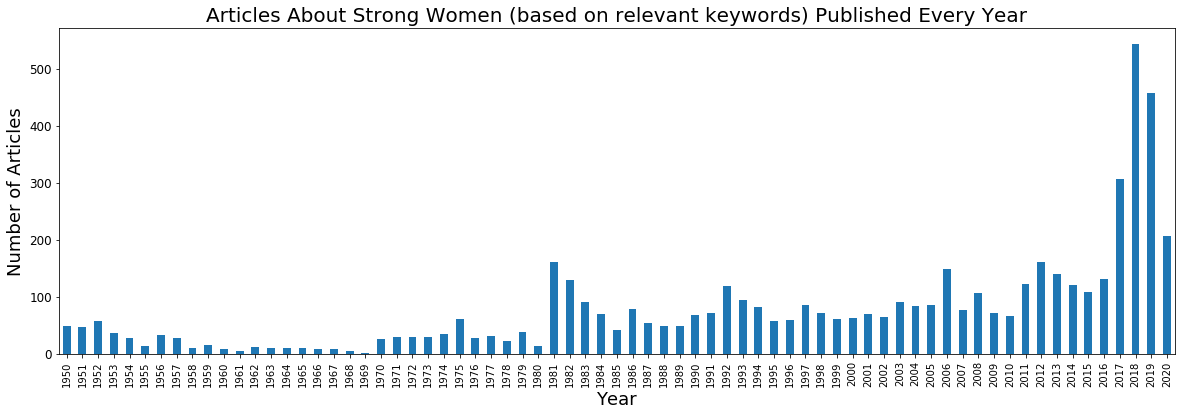

In [376]:
ax = project_df.groupby('year')['headline'].count().plot(kind='bar', figsize=(20, 6))
ax.set(xlabel='Year', ylabel='Number of Articles')
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.set_title('Articles About Strong Women (based on relevant keywords) Published Every Year', \
             fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

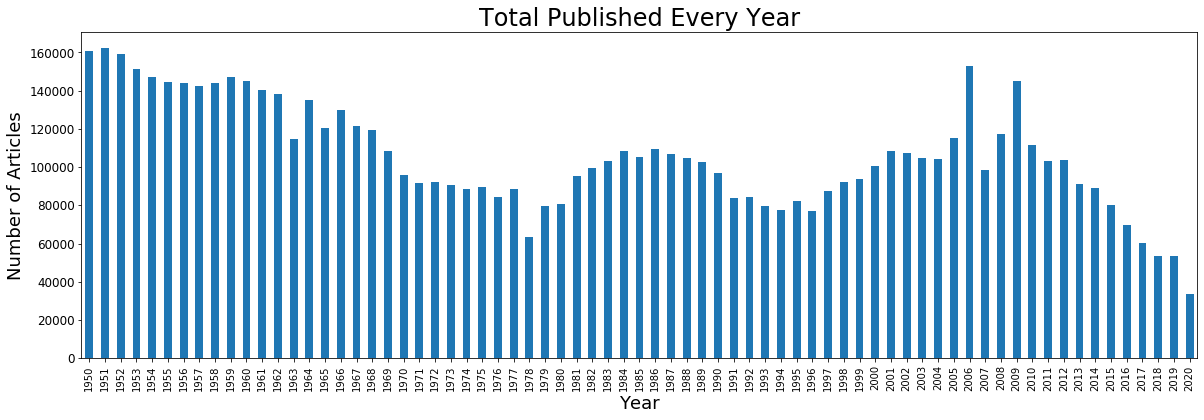

In [260]:
ax = df.groupby(df.date.dt.year)['headline'].count().plot(kind='bar', figsize=(20, 6))
ax.set(xlabel='Year', ylabel='Number of Articles')
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.set_title('Total Published Every Year', fontdict={'fontsize': 24, 'fontweight': 'medium'})
plt.show()

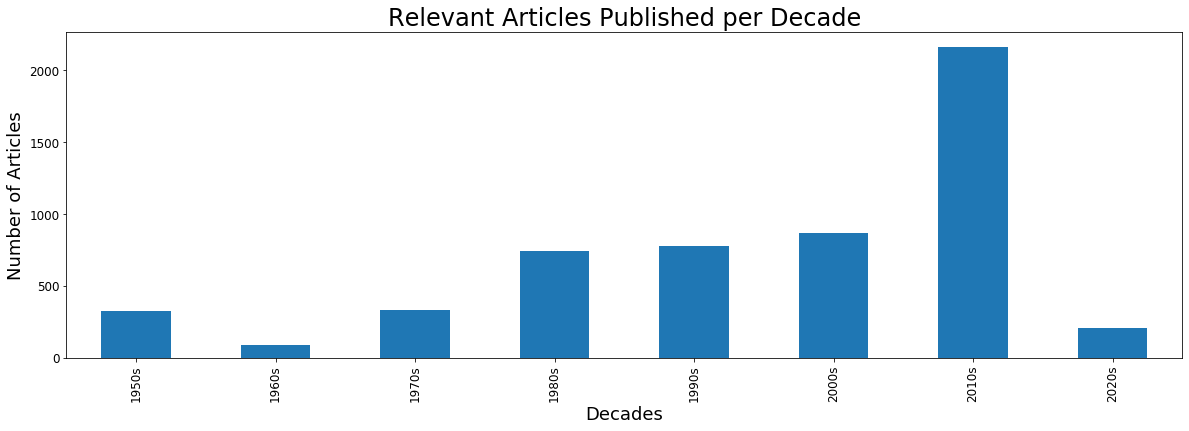

In [378]:
ax = project_df.groupby('decade')['headline'].count().plot(kind='bar', figsize=(20, 6))
ax.set(xlabel='Decades', ylabel='Number of Articles')
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.set_title('Relevant Articles Published per Decade', fontdict={'fontsize': 24, 'fontweight': 'medium'})
plt.show()

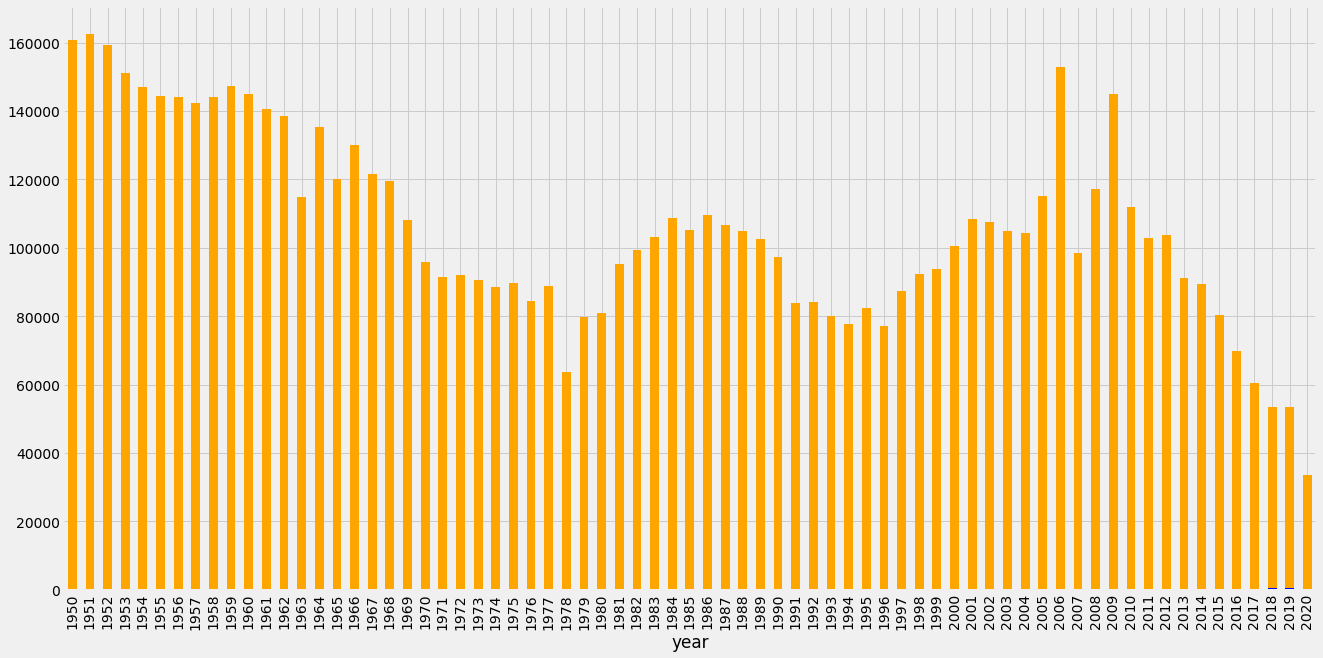

In [467]:
_, ax = plt.subplots() 

ax1 = df.groupby(df.date.dt.year)['headline'].count().plot(kind='bar', ax = ax, color = 'orange')
ax2 = project_df.groupby('year')['headline'].count().plot(kind='bar', ax = ax, color = 'blue')


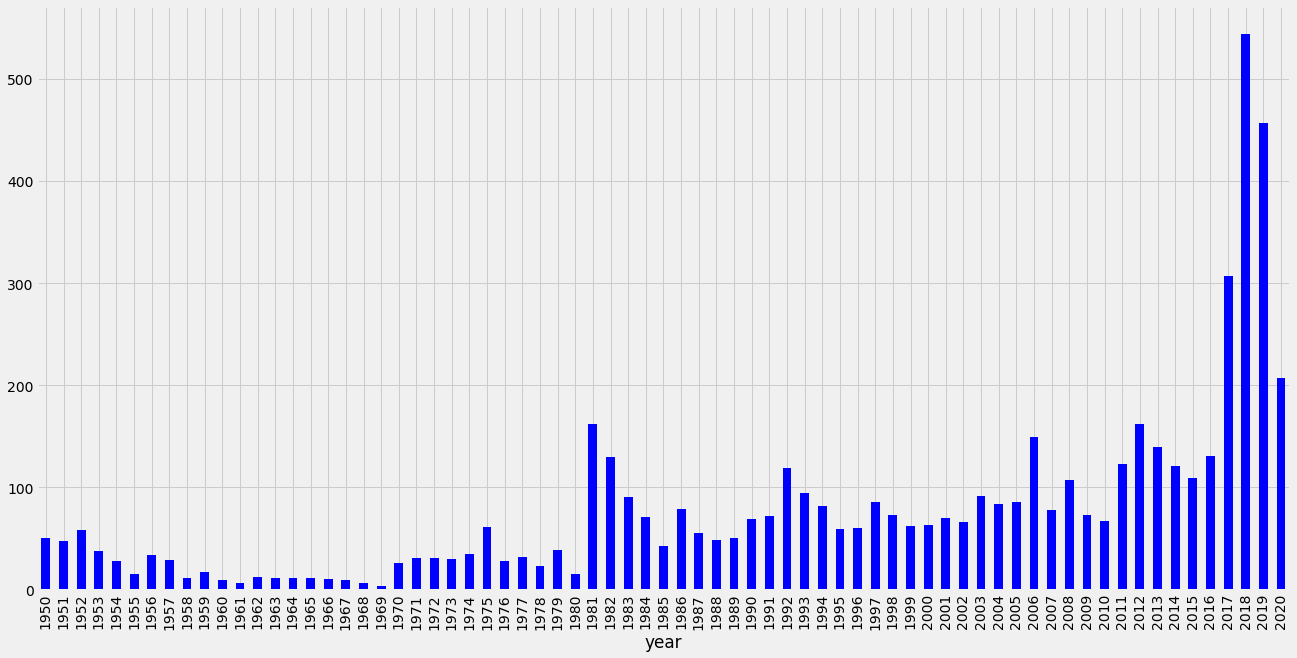

In [468]:
_, ax = plt.subplots() 

#ax1 = df.groupby(df.date.dt.year)['headline'].count().plot(kind='bar', ax = ax, color = 'orange')
ax2 = project_df.groupby('year')['headline'].count().plot(kind='bar', ax = ax, color = 'blue')


At first, I thought about superimposing one graph over another to show the "stron women coverage" vs. "the rest" of the coverage, but then I realized that once we do superimpose these two graphs, the blue one will look like a line. If you look very closely, you can see the most visible portion: the 2018 and 2019 spike. <br>
*****************************************************************************************************************
**Conclusion**: womens' issues were covered even in the earlier days, they just weren't always coded properly: keywords were either missing or misleading, thus making it more difficult for a researcher to find the wanted material through the Archive API. <br>
*****************************************************************************************************************
Some **interesting discoveries** to ponder over: <br>
In the early 1950's, according to the analysis of n-grams, there were many mentions of professional opportunities for women. A lot of them graduated from universities to become doctors in order to join the navy. I attribute this spike of publicity to the aftermath of the World War II: women were encouraged to join the workforce in order to supplement the military efforts. Remember the Rosie the Riveter poster?

Now, let's look at the **persons** dataframe: how often the names of those historic figures appear in the headlines.

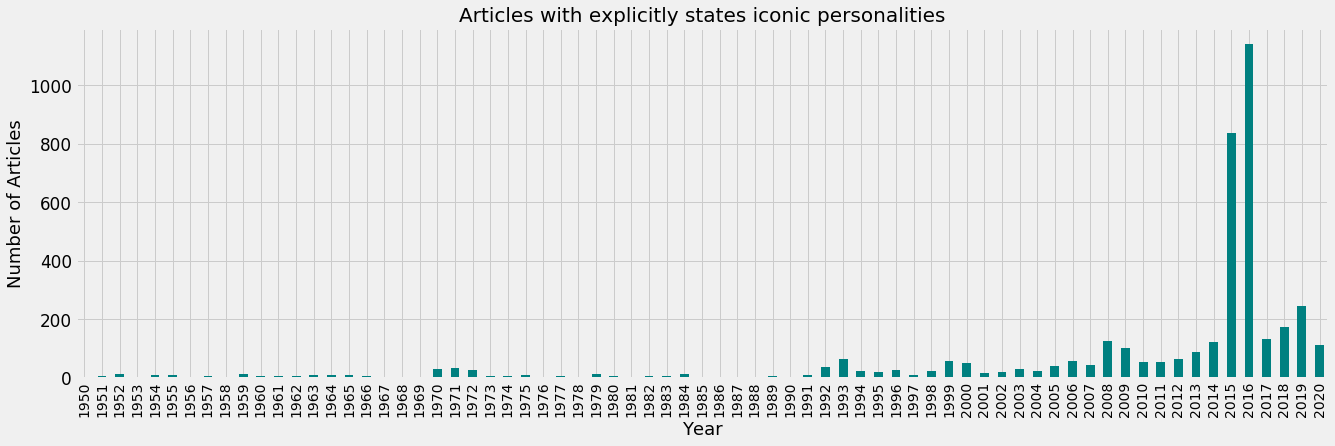

In [483]:
ax = persons.groupby('year')['headline'].count().plot(kind='bar', figsize=(20, 6), color = 'teal')
ax.set(xlabel='Year', ylabel='Number of Articles')
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.set_title('Articles with explicitly states iconic personalities', \
             fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

In [532]:
spike_group0 = persons[persons.year.eq(1952)]

In [533]:
spike_group0

,headline,date,doc_type,material_type,section,keywords,keywords_joined,year,decade
8,santa anita stake goes to hill gail; calumet derby hopeful beats haltafire by 4 lengths -phil d....,1952-01-06,article,Archives,NaN,[],,1952,1950s
9,"hill prince, windy city ii choices in rich santa anita stake races",1952-02-09,article,Archives,NaN,[],,1952,1950s
10,"hill prince, windy city ii triumph for arcaro sweep of coast stakes; chenery star scores easily ...",1952-02-10,article,Archives,NaN,[],,1952,1950s
11,"hill prince named in handicap today; booked for 2d start of year, chenery star draws impost of 1...",1952-02-16,article,Archives,NaN,[],,1952,1950s
12,"hill gail, 9-2, takes santa anita derby; calumet racer beats favored windy city ii by 4 lengths ...",1952-02-24,article,Archives,NaN,"[horses, races and race horses]","horses, races and race horses",1952,1950s
13,hill prince choice in coast contest; 1951 champion declared fit for the 15th running of santa an...,1952-03-01,article,Archives,NaN,[],,1952,1950s
14,hill prince to be retired as racer; westrope suspended; chenery champion going to stud farm hill...,1952-03-04,article,Archives,NaN,"[horses, races and race horses, miscellaneous section]","horses, races and race horses, miscellaneous section",1952,1950s
15,flowers in the desert; beauty behind barbed wire. the arts of the japanese in our war relocation...,1952-06-15,article,Archives,NaN,[book reviews],book reviews,1952,1950s
16,calumet stars on coast; hill gail is among 30 horses shipped to santa anita,1952-10-29,article,Archives,NaN,[],,1952,1950s
17,margaret sanger in hong kong,1952-11-11,article,Archives,NaN,[],,1952,1950s


Papers talk about human rights and family planning.

In [490]:
spike_group1 = persons[persons.year.eq(1970)]

In [491]:
spike_group1

,headline,date,doc_type,material_type,section,keywords,keywords_joined,year,decade
116,havelock ellis and eleanor roosevelt helped,1970-04-19,article,Archives,NaN,"[birth control and planned parenthood, book reviews]","birth control and planned parenthood, book reviews",1970,1970s
117,shirley chisholm: willing to speak out,1970-05-22,article,Archives,NaN,[deaths],deaths,1970,1970s
118,ambro links shirley chisholm to party ‘cabal’,1970-05-29,article,Archives,NaN,"[elections, governor, campaign outlook and general comment, elections, lieutenant governor, drug...","elections, governor, campaign outlook and general comment, elections, lieutenant governor, drug ...",1970,1970s
119,f.b.i. enters hunt for angela davis,1970-08-17,article,Archives,NaN,[courts],courts,1970,1970s
120,most‐wanted list adds angela davis,1970-08-19,article,Archives,NaN,[courts],courts,1970,1970s
121,angela davis: the making of a radical,1970-08-23,article,Archives,NaN,[],,1970,1970s
122,soledad: a letter to angela davis,1970-10-13,article,Archives,NaN,[prisons and prisoners],prisons and prisoners,1970,1970s
123,f.b.i. seizes angela daviszn motel here,1970-10-14,article,Archives,NaN,[courts],courts,1970,1970s
124,woman put on f.b.i. list in place of angela davis,1970-10-15,article,Archives,NaN,"[politics and government, fringe political movements, bombs and bomb plots]","politics and government, fringe political movements, bombs and bomb plots",1970,1970s
125,the angela davis tragedy,1970-10-16,article,Archives,NaN,"[courts, editorials]","courts, editorials",1970,1970s


**1970**: The Times talks about **Angela Davis** a lot.

In [495]:
from wordcloud import WordCloud, STOPWORDS
angela_headlines = ' '.join(spike_group1['headline'].str.lower())

In [502]:
stopwords = STOPWORDS
#stopwords.add('will')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width = 480, height = 480).\
generate(angela_headlines)

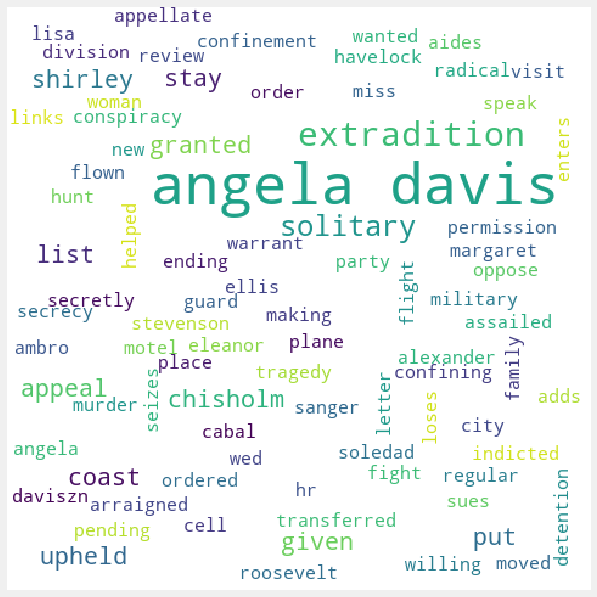

In [503]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off");

In [492]:
spike_group2 = persons[persons.year.eq(1993)]

In [493]:
spike_group2

,headline,date,doc_type,material_type,section,keywords,keywords_joined,year,decade
335,an afternoon with -- maya angelou; a wordsmith at her inaugural anvil,1993-01-20,article,Biography,NaN,"[inaugurations, poetry and poets, presidents and presidency (us), united states politics and gov...","inaugurations, poetry and poets, presidents and presidency (us), united states politics and gove...",1993,1990s
336,maya angelou: 'on the pulse of morning',1993-01-21,article,Text,NaN,"[inaugurations, poetry and poets, united states politics and government]","inaugurations, poetry and poets, united states politics and government",1993,1990s
337,hillary clinton gets policy job and new office,1993-01-22,article,Biography,NaN,"[reform and reorganization, united states politics and government, health insurance, offices, wh...","reform and reorganization, united states politics and government, health insurance, offices, whi...",1993,1990s
338,hillary clinton to head panel on health care,1993-01-26,article,News,NaN,"[reform and reorganization, health insurance, law and legislation, medicine and health]","reform and reorganization, health insurance, law and legislation, medicine and health",1993,1990s
339,"first lady and top official visit, both named hillary clinton",1993-01-27,article,News,NaN,"[presidents and presidency (us), united states politics and government, health insurance, educat...","presidents and presidency (us), united states politics and government, health insurance, educati...",1993,1990s
...,...,...,...,...,...,...,...,...,...
392,the 1993 campaign: campaign trail; hillary clinton praises florio's opposition to assault weapons,1993-10-31,article,News,NaN,"[governors (us), gun control, elections, firearms]","governors (us), gun control, elections, firearms",1993,1990s
393,hillary clinton accuses insurers of lying about health proposal,1993-11-02,article,News,NaN,"[reform and reorganization, advertising, misleading and deceptive advertising, health insurance,...","reform and reorganization, advertising, misleading and deceptive advertising, health insurance, ...",1993,1990s
394,hillary clinton attacks health plans offered by conservative democrats,1993-11-09,article,News,NaN,"[reform and reorganization, health insurance, law and legislation, medicine and health]","reform and reorganization, health insurance, law and legislation, medicine and health",1993,1990s
395,hillary clinton says health plan will be familiar,1993-12-08,article,News,NaN,"[reform and reorganization, health insurance, medicine and health]","reform and reorganization, health insurance, medicine and health",1993,1990s


**1993**: mentions of Hilary Clinton, both as a politician and as a first lady. 

In [500]:
spike_group3 = persons[persons.year.eq(1999)]

In [501]:
spike_group3

,headline,date,doc_type,material_type,section,keywords,keywords_joined,year,decade
497,"new york democrats pin hopes on clinton (hillary, that is)",1999-01-09,article,News,NaN,"[public opinion, biographical information, elections]","public opinion, biographical information, elections",1999,1990s
498,torricelli steps up effort to get hillary clinton to run for u.s. senate,1999-02-13,article,News,NaN,"[public opinion, impeachment, election issues, ethics, elections]","public opinion, impeachment, election issues, ethics, elections",1999,1990s
499,president says hillary clinton would be a 'terrific' senator,1999-02-16,article,News,NaN,"[labor role in politics, finances, elections]","labor role in politics, finances, elections",1999,1990s
500,serena williams leaves her mark on davenport,1999-03-08,article,News,NaN,"[tennis, evert cup]","tennis, evert cup",1999,1990s
501,serena williams reaches final,1999-03-13,article,News,NaN,"[tennis, evert cup]","tennis, evert cup",1999,1990s
502,moya no. 1; serena williams beats graf in evert,1999-03-14,article,News,NaN,"[newsweek champions cup (tennis), evert cup (tennis), tennis]","newsweek champions cup (tennis), evert cup (tennis), tennis",1999,1990s
503,"call by call, hillary clinton queries new york leaders",1999-03-19,article,News,NaN,"[labor role in politics, elections]","labor role in politics, elections",1999,1990s
504,serena williams will put streak on line against hingis,1999-03-25,article,News,NaN,"[lipton international players championships (tennis), tennis]","lipton international players championships (tennis), tennis",1999,1990s
505,"venus williams gains; and yes, so does serena",1999-03-26,article,News,NaN,"[lipton international players championships (tennis), tennis]","lipton international players championships (tennis), tennis",1999,1990s
506,williams showdown: venus beats sister serena,1999-03-29,article,News,NaN,"[lipton international players championships (tennis), tennis]","lipton international players championships (tennis), tennis",1999,1990s


In [505]:
serena_headlines = ' '.join(spike_group3['headline'].str.lower())
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width = 480, height = 480).\
generate(serena_headlines)

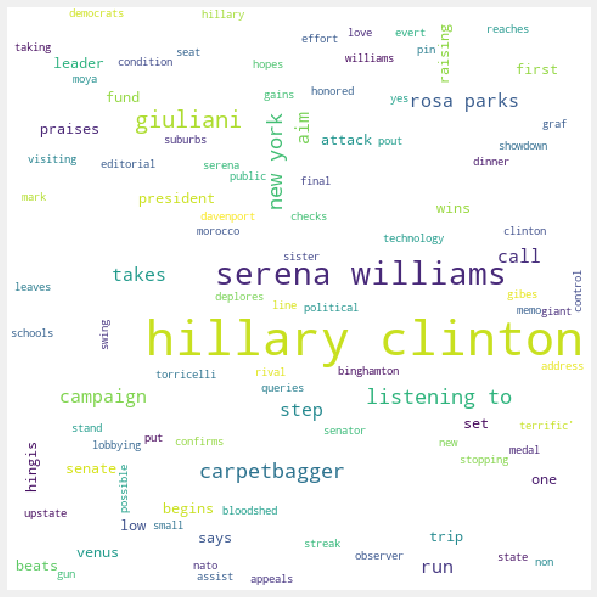

In [506]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2)
plt.axis("off");

**1999:** Hillary Clinton and Serena Williams are sharing the spotlight. Rosa Parks if finally being recognized for her noble effort: "taking a small seat and a giant stance."

In [507]:
spike_group4 = persons[persons.year.eq(2006)]

In [508]:
spike_group4

,headline,date,doc_type,material_type,section,keywords,keywords_joined,year,decade
729,a new age of architecture ushered in financial gloom,2006-01-01,article,News,NaN,"[new year, architecture, buildings (structures)]","new year, architecture, buildings (structures)",2006,2000s
730,hillary clinton says white house has mishandled iran,2006-01-19,article,News,NaN,[],,2006,2000s
731,hantuchova stops serena williams,2006-01-20,article,News,NaN,[],,2006,2000s
732,serena williams loses at australian open,2006-01-20,article,News,NaN,[],,2006,2000s
733,rust and hantuchova catch up to serena williams,2006-01-21,article,News,NaN,"[australian open (tennis), tennis]","australian open (tennis), tennis",2006,2000s
734,"coretta scott king, 78, widow of dr. martin luther king jr., dies",2006-01-31,article,News,NaN,[civil rights],civil rights,2006,2000s
735,"coretta scott king, widow of civil rights icon, dies",2006-01-31,article,News,NaN,[],,2006,2000s
736,the life of coretta scott king,2006-01-31,multimedia,Slideshow,NaN,[],,2006,2000s
737,"coretta scott king, 78, widow of dr. martin luther king jr., dies",2006-01-31,article,Obituary,NaN,[],,2006,2000s
738,"coretta scott king, 78, widow of dr. martin luther king jr., dies",2006-01-31,article,News,NaN,[],,2006,2000s


In [509]:
coretta_headlines = ' '.join(spike_group4['headline'].str.lower())
wordcloud3 = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width = 480, height = 480).\
generate(coretta_headlines)

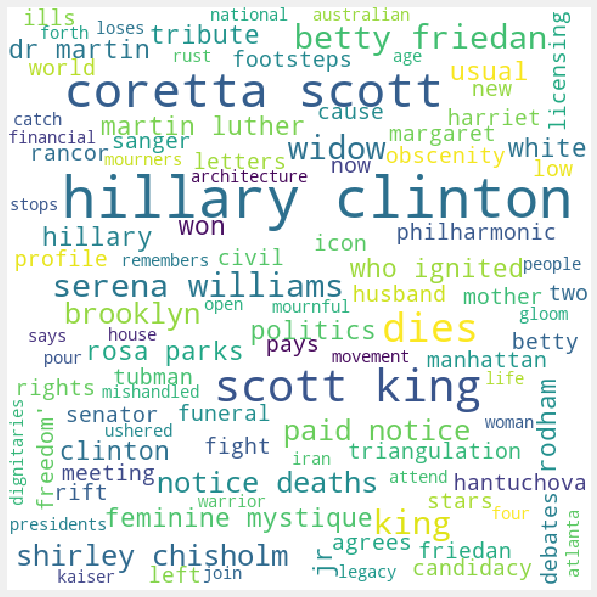

In [510]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud3)
plt.axis("off");

In **2006** <br>
Hillary Clinton gets a lot of publicity as she starts running for president. <br>
Coretta Scott King dies: NYT celebrates her life and achievement. <br>
"Triumphant Serena Williams savors her role as an underdog." <br>
Tribute to Harriet Tubman's heroic effort is paid through musical pieces. <br>

The newspaper mentions Margaret Sanger, the reproductive health pioneer and advocate.
Even though her work took place a century ago, this conversation is valid even to this day.
A 40 percent infant and child mortality rate, maternal mortality of 99 percent higher than the modern times: this was the reality that prompted Margaret Sanger to launch her campaign. She advocated for the women's right to choose.

In [514]:
spike_group5 = persons[persons.year.eq(2015)]

In [520]:
spike_group5.sample(20)

,headline,date,doc_type,material_type,section,keywords,keywords_joined,year,decade
1848,a wedding for couple in hillary clinton announcement video,2015-07-30,article,News,NaN,"[presidential election of 2016, same-sex marriage, civil unions and domestic partnerships, weddi...","presidential election of 2016, same-sex marriage, civil unions and domestic partnerships, weddin...",2015,2010s
1446,michelle obama praised for bold stand she didn’t take in saudi arabia,2015-01-29,article,News,NaN,"[united states international relations, first ladies (us), women and girls]","united states international relations, first ladies (us), women and girls",2015,2010s
1995,justice dept. says hillary clinton had authority to delete certain emails,2015-09-12,article,News,NaN,"[e-mail, presidential election of 2016, benghazi attack (2012)]","e-mail, presidential election of 2016, benghazi attack (2012)",2015,2010s
1745,frank discussions on race help define hillary clinton’s 2016 campaign,2015-06-22,article,News,NaN,"[presidential election of 2016, race and ethnicity, blacks, black people]","presidential election of 2016, race and ethnicity, blacks, black people",2015,2010s
2099,another republican lawmaker suggests benghazi inquiry is going after hillary clinton,2015-10-15,article,News,NaN,"[benghazi attack (2012), presidential election of 2016]","benghazi attack (2012), presidential election of 2016",2015,2010s
2227,michelle obama picks 4 designers for white house’s holiday makeover,2015-12-03,article,News,NaN,"[fashion and apparel, white house building (washington, dc), christmas, interior design and furn...","fashion and apparel, white house building (washington, dc), christmas, interior design and furni...",2015,2010s
1924,serena williams sings karaoke,2015-08-27,multimedia,Video,NaN,[],,2015,2010s
1836,republicans fault hillary clinton over emails on talk shows,2015-07-26,article,News,NaN,"[e-mail, presidential election of 2016]","e-mail, presidential election of 2016",2015,2010s
1952,new poll shows negatives adding up for hillary clinton and donald trump,2015-09-02,article,News,NaN,"[hispanic-americans, polls and public opinion, presidential election of 2016, race and ethnicity]","hispanic-americans, polls and public opinion, presidential election of 2016, race and ethnicity",2015,2010s
1960,hillary clinton on bernie sanders: waving your arms doesn’t mean a lot,2015-09-04,article,News,NaN,"[e-mail, polls and public opinion, presidential election of 2016, united states economy, united ...","e-mail, polls and public opinion, presidential election of 2016, united states economy, united s...",2015,2010s


In [516]:
modern_headlines = ' '.join(spike_group5['headline'].str.lower())
wordcloud4 = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width = 480, height = 480).\
generate(modern_headlines)

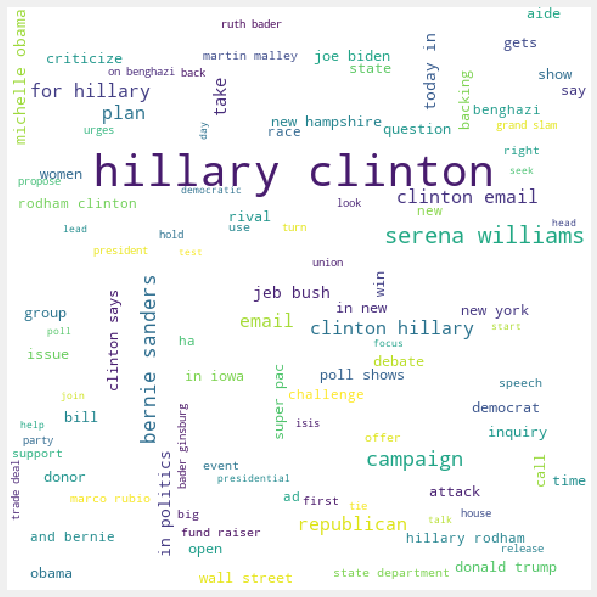

In [517]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud4)
plt.axis("off");

2015 and 2016: anticipation of election.

### N-Grams

In [438]:
import unicodedata

from nltk.corpus import stopwords

# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['pron']


In [419]:
import en_core_web_sm
import spacy
import string

In [420]:
spacy_parser = spacy.load('en_core_web_sm')

In [428]:
project_df.head()

,date,decade,doc_type,headline,keywords,keywords_joined,material_type,section,year
0,1950-06-03,1950s,article,women doctors join navy; seventeen end their training and are ordered to duty,"[military forces, miscellaneous section]","military forces, miscellaneous section",Archives,NaN,1950
1,1950-06-11,1950s,article,"n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical...","[medicine and health, women, miscellaneous section, commencement]","medicine and health, women, miscellaneous section, commencement",Archives,NaN,1950
2,1950-06-17,1950s,article,greets women doctors; dean says new york medical college has no curbs,[],,Archives,NaN,1950
3,1950-08-10,1950s,article,army issues call for more nurses; dietitians and therapists are also needed--high rank for women...,"[medicine and health, nursing and nurses]","medicine and health, nursing and nurses",Archives,NaN,1950
4,1950-08-28,1950s,article,"army issues bids to women doctors; commissions in the medical, dental, veterinary and service co...",[medicine and health],medicine and health,Archives,NaN,1950


In [451]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation, 
    remove words containing numbers and lemmatize using spacy'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    lemmas = [t.lemma_ for t in spacy_parser(text)]
    text = ' '.join(lemmas)
    return text

In [460]:
corpus = project_df['headline'].apply(clean_text)

**women_doctors** is a dataframe obtained by slicing the project_df dispalying the 1950's and 1960's. I thought it would be interesting to illustrate how the war and the post-war socio-political climate impacted women's educational and professional opportunities.

1950-1969: articles talk about female doctors in the army. Courtesy of two wars: World War II , which happened prior to the scope of this research, and the Vietnam War. 

In [538]:
women_doctors = corpus[0:29]

In [541]:
women_doctors

0                               woman doctor join navy seventeen end -PRON- training and be order to duty
1        nyu to graduate   woman doctor war give -PRON- as other an opportunity to enter a medical school
2                                      greets woman doctor dean say new york medical college have no curb
3     army issue call for more nurse dietitian and therapist be also neededhigh rank for woman doctor ...
4      army issue bid to woman doctor commission in the medical dental veterinary and service corps offer
5                             to greet woman doctors association will be host here to foreigner at parley
6                                                                                 woman doctors bill vote
7       woman doctor here for congress international convention open in philadelphia on sunday housewo...
8                                                                                  woman doctor volunteer
9                                 rabbis decla

In [545]:
doctor_headlines = ' '.join(women_doctors)
doctor_cloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, width = 400, height = 400).\
generate(doctor_headlines)

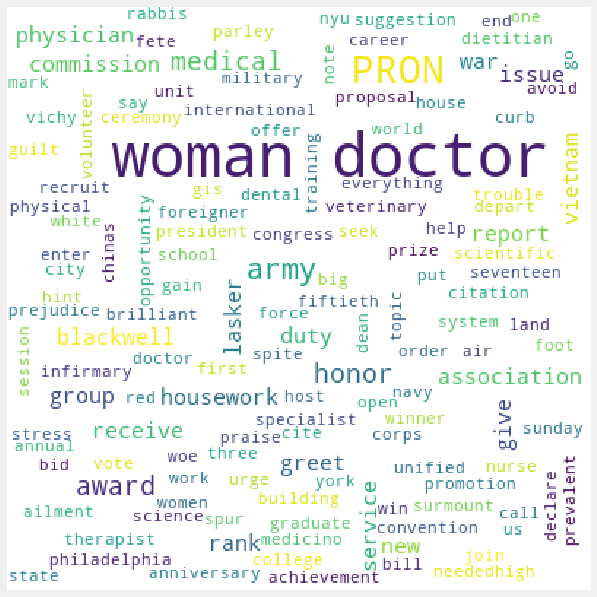

In [546]:
plt.figure(figsize=(20,10))
plt.imshow(doctor_cloud)
plt.axis("off");

In [537]:
project_df.head(40)

,date,decade,doc_type,headline,keywords,keywords_joined,material_type,section,year
0,1950-06-03,1950s,article,women doctors join navy; seventeen end their training and are ordered to duty,"[military forces, miscellaneous section]","military forces, miscellaneous section",Archives,NaN,1950
1,1950-06-11,1950s,article,"n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical...","[medicine and health, women, miscellaneous section, commencement]","medicine and health, women, miscellaneous section, commencement",Archives,NaN,1950
2,1950-06-17,1950s,article,greets women doctors; dean says new york medical college has no curbs,[],,Archives,NaN,1950
3,1950-08-10,1950s,article,army issues call for more nurses; dietitians and therapists are also needed--high rank for women...,"[medicine and health, nursing and nurses]","medicine and health, nursing and nurses",Archives,NaN,1950
4,1950-08-28,1950s,article,"army issues bids to women doctors; commissions in the medical, dental, veterinary and service co...",[medicine and health],medicine and health,Archives,NaN,1950
5,1950-09-05,1950s,article,to greet women doctors; association will be host here to foreigners at parley,[],,Archives,NaN,1950
6,1950-09-07,1950s,article,women doctors bill voted,[],,Archives,NaN,1950
7,1950-09-08,1950s,article,71 women doctors here for congress; international convention opens in philadelphia on sunday --h...,[],,Archives,NaN,1950
8,1951-01-19,1950s,article,2 women doctors volunteer,[medicine and health],medicine and health,Archives,NaN,1951
9,1951-01-21,1950s,article,3 rabbis declare red china's guilt; first women doctors report for army duty,"[book reviews, medicine and health, sermons, sermons, sermons, sermons, sermons]","book reviews, medicine and health, sermons, sermons, sermons, sermons, sermons",Archives,NaN,1951


In [535]:
corpus.head()

0                              woman doctor join navy seventeen end -PRON- training and be order to duty
1       nyu to graduate   woman doctor war give -PRON- as other an opportunity to enter a medical school
2                                     greets woman doctor dean say new york medical college have no curb
3    army issue call for more nurse dietitian and therapist be also neededhigh rank for woman doctor ...
4     army issue bid to woman doctor commission in the medical dental veterinary and service corps offer
Name: headline, dtype: object

#### Over-all word frequencies in headlines:

In [464]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(corpus)
frequencies = sum(sparse_matrix).toarray()[0]
ngram_df_project = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [311]:
from wordcloud import WordCloud, STOPWORDS
all_headlines = ' '.join(project_df['headline'].str.lower())

In [325]:
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, width = 480, height = 480).\
generate(all_headlines)

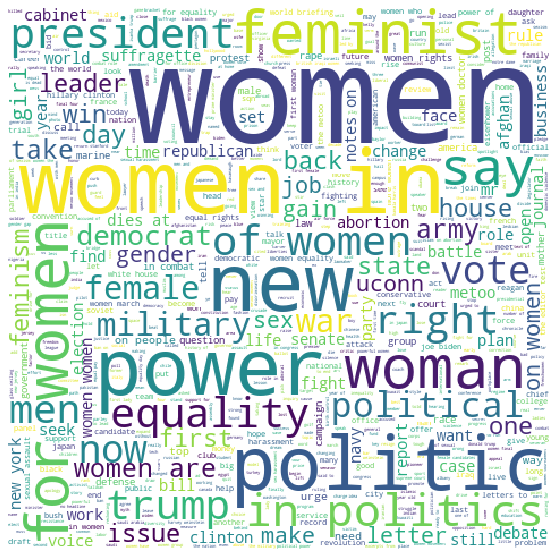

In [334]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off");

## Sentiment Analysis

We are going to analyze the sentiment **associated with the headlines** both in project_df and persons_df, using the NLTK's Vader library. Can we actually pick up on *how the **journalists** felt* about an issue while writing an article?

In [ ]:
import nltk 
nltk.download('vader_lexicon')

In [340]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in project_df.headline:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:3])

[{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296, 'headline': 'women doctors join navy; seventeen end their training and are ordered to duty'}, {'neg': 0.18, 'neu': 0.691, 'pos': 0.129, 'compound': -0.2732, 'headline': 'n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical school'}, {'neg': 0.159, 'neu': 0.725, 'pos': 0.116, 'compound': -0.1531, 'headline': 'greets women doctors; dean says new york medical college has no curbs'}]


In [342]:
sentiment_df = pd.DataFrame.from_records(results)
sentiment_df.sample(20)

,neg,neu,pos,compound,headline
5310,0.000,1.000,0.000,0.0000,is sarah lucas right for the #metoo moment?
799,0.000,1.000,0.000,0.0000,excerpts from questions and answers in carter's telephone call‐in program
1412,0.000,1.000,0.000,0.0000,iran assembly pushes on women's rights
334,0.000,0.777,0.223,0.3182,women's role in county politics is continuing to expand
5037,0.000,1.000,0.000,0.0000,bloggingheads: why everything changed
1267,0.000,0.575,0.425,0.5334,mrs. clinton shouldn't start weakening; offensive to women
4212,0.195,0.708,0.097,-0.2732,"inbee park reigns at major, no matter what it’s called"
3087,0.213,0.787,0.000,-0.2263,‘women power’ protests ‘male domination’ of wall st.
3841,0.565,0.435,0.000,-0.5994,women of war speak
1397,0.630,0.370,0.000,-0.5267,trapped in afghanistan


In [547]:
sentiment_df

,neg,neu,pos,compound,headline
0,0.000,0.845,0.155,0.2960,women doctors join navy; seventeen end their training and are ordered to duty
1,0.180,0.691,0.129,-0.2732,"n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical..."
2,0.159,0.725,0.116,-0.1531,greets women doctors; dean says new york medical college has no curbs
3,0.099,0.810,0.092,-0.0516,army issues call for more nurses; dietitians and therapists are also needed--high rank for women...
4,0.000,1.000,0.000,0.0000,"army issues bids to women doctors; commissions in the medical, dental, veterinary and service co..."
...,...,...,...,...,...
5505,0.000,0.804,0.196,0.2960,the nudes aren’t going away. katie hill’s ok with that.
5506,0.000,0.787,0.213,0.4019,woman 'veep' urged; business and professional clubs campaign in each party
5507,0.000,0.588,0.412,0.5423,small-business agency gives award to woman
5508,0.259,0.741,0.000,-0.2732,battling perceptions about minority- and woman-owned businesses


In [548]:
dates = project_df['year']

In [550]:
sentiment_df = pd.merge(sentiment_df, dates, left_index=True, right_index=True)

In [551]:
sentiment_df

,neg,neu,pos,compound,headline,year
0,0.000,0.845,0.155,0.2960,women doctors join navy; seventeen end their training and are ordered to duty,1950
1,0.180,0.691,0.129,-0.2732,"n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical...",1950
2,0.159,0.725,0.116,-0.1531,greets women doctors; dean says new york medical college has no curbs,1950
3,0.099,0.810,0.092,-0.0516,army issues call for more nurses; dietitians and therapists are also needed--high rank for women...,1950
4,0.000,1.000,0.000,0.0000,"army issues bids to women doctors; commissions in the medical, dental, veterinary and service co...",1950
...,...,...,...,...,...,...
5505,0.000,0.804,0.196,0.2960,the nudes aren’t going away. katie hill’s ok with that.,2020
5506,0.000,0.787,0.213,0.4019,woman 'veep' urged; business and professional clubs campaign in each party,1952
5507,0.000,0.588,0.412,0.5423,small-business agency gives award to woman,1991
5508,0.259,0.741,0.000,-0.2732,battling perceptions about minority- and woman-owned businesses,2012


In [553]:
sentiment_df['label'] = 0
sentiment_df.loc[sentiment_df['compound'] > 0.2, 'label'] = 1
sentiment_df.loc[sentiment_df['compound'] < -0.2, 'label'] = -1
sentiment_df.head()

,neg,neu,pos,compound,headline,year,label
0,0.000,0.845,0.155,0.2960,women doctors join navy; seventeen end their training and are ordered to duty,1950,1
1,0.180,0.691,0.129,-0.2732,"n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical...",1950,-1
2,0.159,0.725,0.116,-0.1531,greets women doctors; dean says new york medical college has no curbs,1950,0
3,0.099,0.810,0.092,-0.0516,army issues call for more nurses; dietitians and therapists are also needed--high rank for women...,1950,0
4,0.000,1.000,0.000,0.0000,"army issues bids to women doctors; commissions in the medical, dental, veterinary and service co...",1950,0


In [554]:
sentiment_df2 = sentiment_df[['headline', 'label']]

In [555]:
sentiment_df2.to_csv('project_sentiment.csv', mode='a', encoding='utf-8', index=False)

In [556]:
sentiment_df.label.value_counts()

 0    3213
-1    1263
 1    1034
Name: label, dtype: int64

Let's look at the overall sentiment percentage:

In [557]:
sentiment_df.label.value_counts(normalize=True) * 100

 0    58.31216
-1    22.92196
 1    18.76588
Name: label, dtype: float64

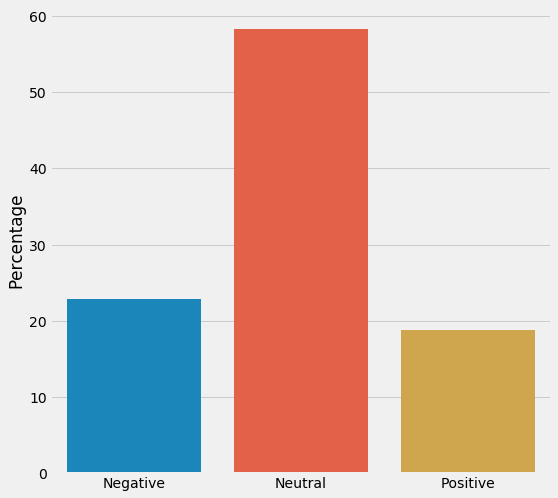

In [565]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.color_palette("rocket_r")
counts = sentiment_df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

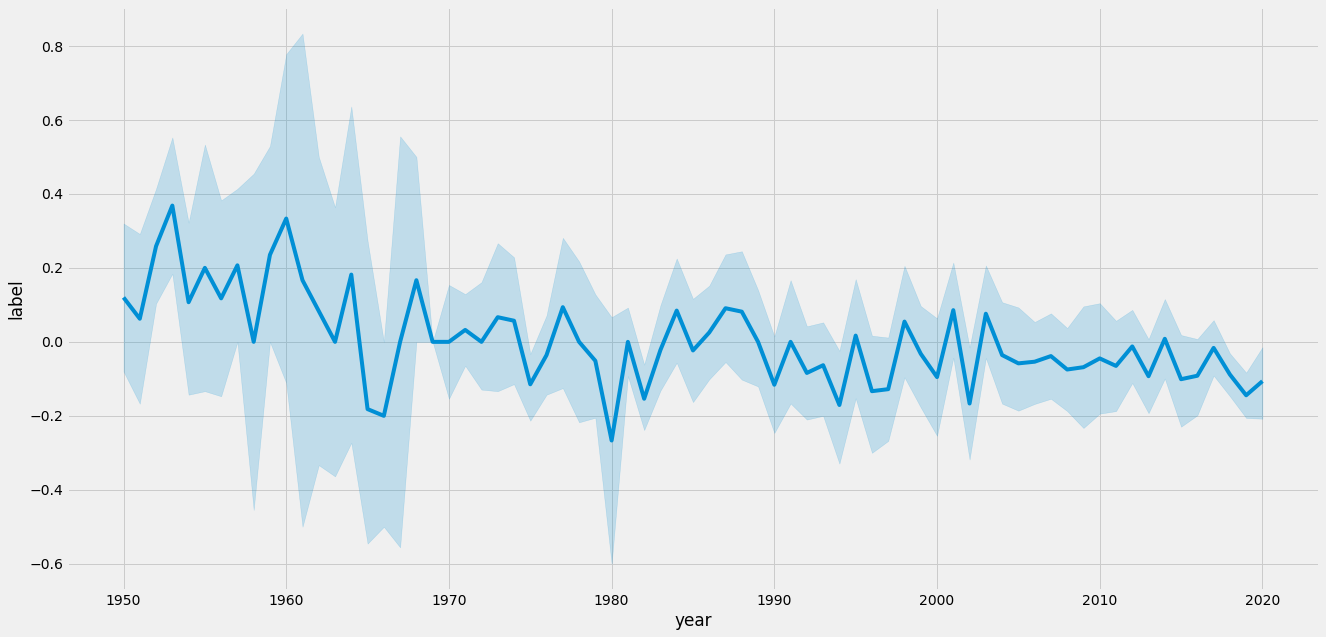

In [566]:
sns.lineplot(x="year", y="label", data=sentiment_df) 
plt.show()

Let's take a look at the persons dataframe:

In [580]:
results2 = []
for line in persons.headline:
    pol_score2 = sia.polarity_scores(line)
    pol_score2['headline'] = line
    results2.append(pol_score2)

print(results[:3])

[{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296, 'headline': 'women doctors join navy; seventeen end their training and are ordered to duty'}, {'neg': 0.18, 'neu': 0.691, 'pos': 0.129, 'compound': -0.2732, 'headline': 'n.y.u. to graduate 21 women doctors; war gave them, as others, an opportunity to enter a medical school'}, {'neg': 0.159, 'neu': 0.725, 'pos': 0.116, 'compound': -0.1531, 'headline': 'greets women doctors; dean says new york medical college has no curbs'}]


In [581]:
persons_sentiment_df = pd.DataFrame.from_records(results2)
persons_sentiment_df.sample(20)

,neg,neu,pos,compound,headline
3137,0.000,1.000,0.000,0.0000,serena williams’s backhand
913,0.000,1.000,0.000,0.0000,michelle obama's high note
762,0.000,1.000,0.000,0.0000,"hillary clinton is a shoo-in, but should she be?"
4023,0.000,1.000,0.000,0.0000,what kamala harris means for wall street and silicon valley
2655,0.000,0.754,0.246,0.3832,hillary clinton ad spreads ‘a little hope and love’
3131,0.000,1.000,0.000,0.0000,hillary clinton and donald trump head into crucial last 2 months
378,0.000,1.000,0.000,0.0000,amelia earhart doesn't go uncelebrated; military women
1772,0.000,1.000,0.000,0.0000,hillary clinton’s team is wary as bernie sanders finds footing in iowa
1863,0.000,1.000,0.000,0.0000,osama bin laden raid may be an issue in a joe biden-hillary clinton contest
3811,0.000,1.000,0.000,0.0000,"missouri, india, harriet tubman: your thursday briefing"


In [582]:
persons_dates = persons['year']

In [583]:
persons_sentiment_df = pd.merge(persons_sentiment_df, persons_dates, left_index=True, right_index=True)

In [584]:
persons_sentiment_df['label'] = 0
persons_sentiment_df.loc[persons_sentiment_df['compound'] > 0.2, 'label'] = 1
persons_sentiment_df.loc[persons_sentiment_df['compound'] < -0.2, 'label'] = -1
persons_sentiment_df.head()

,neg,neu,pos,compound,headline,year,label
0,0.280,0.720,0.0,-0.7650,"g.p. putnam dead; retired publisher; husband of amelia earhart, flier lost at sea in 1937, was a...",1950,-1
1,0.177,0.823,0.0,-0.6486,"mrs. henry parish, widow of banker; cousin and godmother of mrs. eleanor roosevelt, who was wed ...",1950,-1
2,0.113,0.887,0.0,-0.3182,bee king defeats flap not by head in featured tropical park dash; hill prince checks in at santa...,1950,-1
3,0.000,1.000,0.0,0.0000,"juanita rawlings married in queens; bride of paul g. bohack jr., a senior at adelphi, in richmon...",1951,0
4,0.000,1.000,0.0,0.0000,new ship agency sets global trip; liberty-type harriet tubman will handle 3 full cargoes on a ci...,1951,0


In [585]:
persons_sentiment_df.label.value_counts(normalize=True) * 100

 0    63.254786
 1    20.765832
-1    15.979381
Name: label, dtype: float64

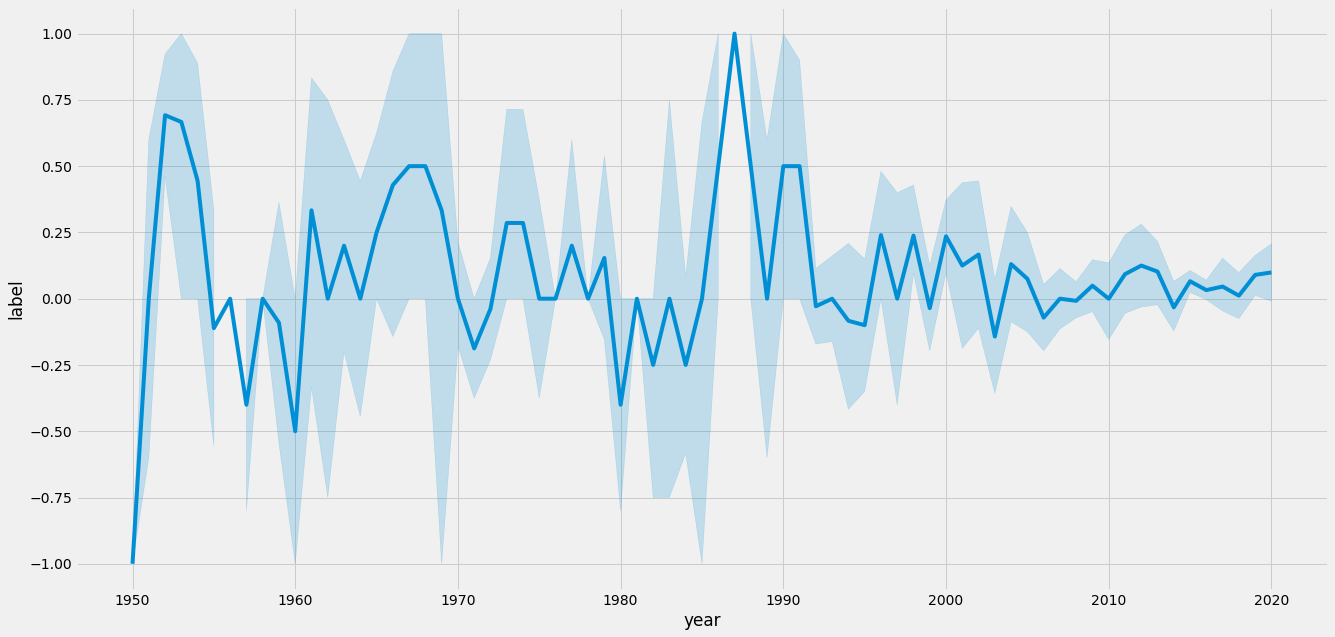

In [586]:
sns.lineplot(x="year", y="label", data=persons_sentiment_df) 
plt.show()